# Import Stuff

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats  import boxcox_normmax
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas_profiling import ProfileReport

# Import Data

In [46]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id',axis = 1,inplace = True)
test.drop('Id',axis = 1,inplace = True)

# From EDA obvious outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])


print (train.columns)
print(test.columns)
print(train.shape,test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Data Analyisng

In [47]:
ProfileReport(train)


In [48]:
train.describe()


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1453.000000  1194.000000    1453.000000  1453.000000  1453.000000   
mean     56.964900    69.775544   10463.490021     6.096352     5.580867   
std      42.367239    23.216208    9875.640434     1.373828     1.110229   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7535.000000     5.000000     5.000000   
50%      50.000000    69.000000    9477.000000     6.000000     5.000000   
75%      70.000000    80.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1453.000000   1453.000000  1445.000000  1453.000000  1453.000000   
mean   1971.268410   1984.863730   102.668512   439.390915    46.559532   
std      30.165103     20.641119   179.465770   433.127562   161.530955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.000000     0.000000   
75%    2000.000000   2004.000000   164.000000   712.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  2188.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1453.000000  1453.000000    1453.000000  1453.000000   
mean       ...          94.275981    46.333792      21.671714     3.426015   
std        ...         125.442057    65.391095      60.767737    29.386956   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1453.000000  1453.000000   1453.000000  1453.000000  1453.000000   
mean     15.133517     2.441844     43.698555     6.320716  2007.814178   
std      55.881824    38.275411    497.308264     2.695848     1.329841   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1453.000000  
mean   181268.625602  
std     79397.417435  
min     34900.000000  
25%    130000.000000  
50%    163500.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

# Choosing Variables

Skewness 1.8907917705993094
Kurtosis 6.557510734457048


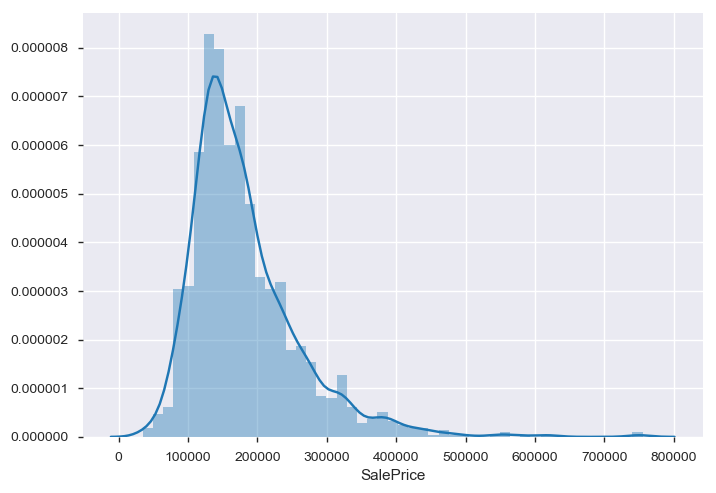

In [49]:
sns.distplot(train.SalePrice)
print ('Skewness',train.SalePrice.skew())
print('Kurtosis',train.SalePrice.kurt())


 mu = 181268.625602 
 sigma = 79370.09

 mu = 12.03 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

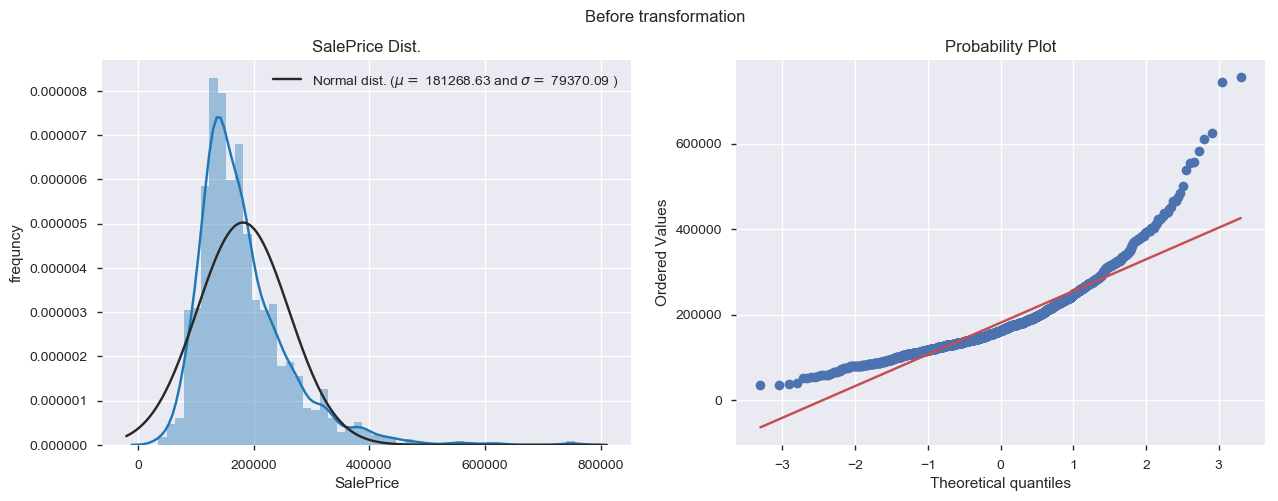

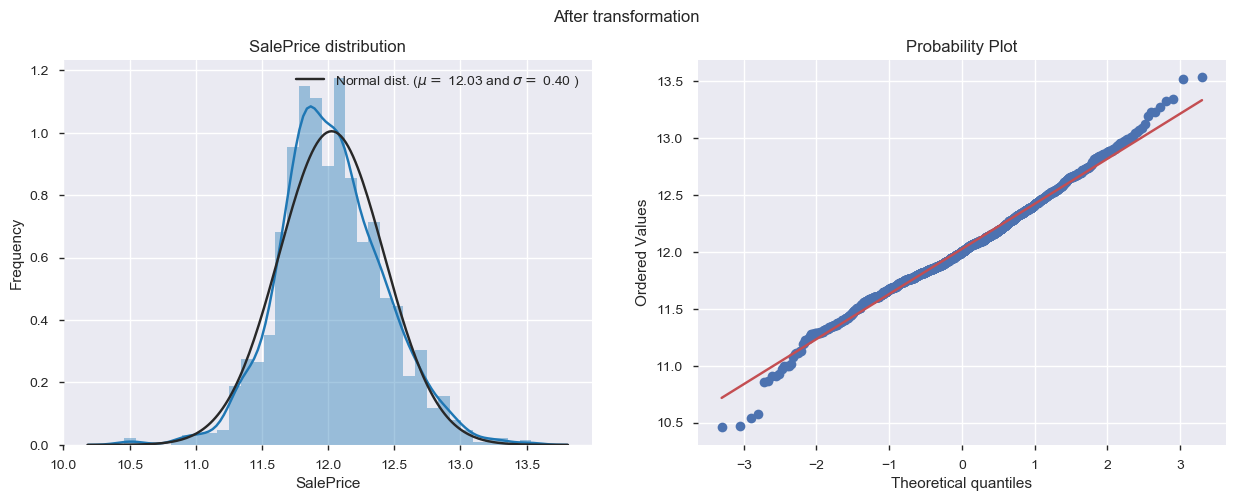

In [50]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice,fit=norm)
mu,sigma = norm.fit(train.SalePrice)
print('\n mu = {:2f} \n sigma = {:.2f}'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('frequncy')
plt.title('SalePrice Dist.')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

#transforming
train.SalePrice = np.log1p(train.SalePrice)
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice , fit=norm);
(mu, sigma) = norm.fit(train.SalePrice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train.SalePrice, plot=plt)
plt.suptitle('After transformation')



In [51]:
data_features = pd.concat((train,test)).reset_index(drop=True)
print(data_features.shape)

(2912, 80)


# Missing Data 

In [52]:
data_features_na = data_features.isnull().sum()
data_features_na = data_features_na[data_features_na>0]
data_features_na.sort_values(ascending=False)

PoolQC          2903
MiscFeature     2807
Alley           2715
Fence           2344
SalePrice       1459
FireplaceQu     1418
LotFrontage      486
GarageQual       158
GarageCond       158
GarageFinish     158
GarageYrBlt      158
GarageType       156
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [53]:
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         2903  0.996909
MiscFeature    2807  0.963942
Alley          2715  0.932349
Fence          2344  0.804945
SalePrice      1459  0.501030
FireplaceQu    1418  0.486951
LotFrontage     486  0.166896
GarageQual      158  0.054258
GarageYrBlt     158  0.054258
GarageFinish    158  0.054258
GarageCond      158  0.054258
GarageType      156  0.053571
BsmtCond         82  0.028159
BsmtExposure     82  0.028159
BsmtQual         81  0.027816
BsmtFinType2     80  0.027473
BsmtFinType1     79  0.027129
MasVnrType       24  0.008242
MasVnrArea       23  0.007898
MSZoning          4  0.001374

In [54]:
str_vars = ['MSSubClass','YrSold','MoSold']
for var in str_vars:
    data_features[var] = data_features[var].apply(str)

In [55]:
# Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

common_vars = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for var in common_vars:
    data_features[var] = data_features[var].fillna(data_features[var].mode()[0])
    
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data_features['MSZoning'] = data_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [56]:
# # data description says NA means "No Pool", majority of houses have no Pool at all in general.
# features[] = features["PoolQC"].fillna("None")
# Replacing missing data with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data_features[col] = data_features[col].fillna('None')

In [57]:
# Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    data_features[col] = data_features[col].fillna(0)

# group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_features['LotFrontage'] = data_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', data_features.shape)

Features size: (2912, 80)


In [58]:
# data description says NA means typical
data_features['Functional'] = data_features['Functional'].fillna('Typ')

In [59]:
total = data_features.isnull().sum().sort_values(ascending=False)
percent = (data_features.isnull().sum()/data_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
SalePrice     1459  0.50103
Electrical       0  0.00000
ExterCond        0  0.00000
ExterQual        0  0.00000
Exterior1st      0  0.00000
Exterior2nd      0  0.00000
Fence            0  0.00000
FireplaceQu      0  0.00000
Fireplaces       0  0.00000
Foundation       0  0.00000

# Numerical and categorical Features

In [60]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = data_features.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = data_features.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
feat_num = data_features[numerical_features]
feat_cat = data_features[categorical_features]

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities',
       'YrSold'],
      dtype='object')
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
  

In [61]:
feat_num.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   
3       961       756          0             3       216.0         0.0   
4      1145      1053          0             4       655.0         0.0   
5       796       566        320             1       732.0         0.0   
6      1694         0          0             3      1369.0         0.0   
7      1107       983          0             3       859.0        32.0   
8      1022       752          0             2         0.0         0.0   
9      1077         0          0             2       851.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch      ...       \
0           1.0           0.0      150.0              0      ...        
1           0.0           1.0      284.0              0      ...        
2           1.0           0.0      434.0              0      ...        
3           1.0           0.0      540.0            272      ...        
4           1.0           0.0      490.0              0      ...        
5           1.0           0.0       64.0              0      ...        
6           1.0           0.0      317.0              0      ...        
7           1.0           0.0      216.0            228      ...        
8           0.0           0.0      952.0            205      ...        
9           1.0           0.0      140.0              0      ...        

   OverallCond  OverallQual  PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  \
0            5            7         0  12.247699            0             8   
1            8            6         0  12.109016            0             6   
2            5            7         0  12.317171            0             6   
3            5            7         0  11.849405            0             7   
4            5            8         0  12.429220            0             9   
5            5            5         0  11.870607            0             5   
6            5            8         0  12.634606            0             7   
7            6            7         0  12.206078            0             7   
8            5            7         0  11.774528            0             8   
9            6            5         0  11.678448            0             5   

   TotalBsmtSF  WoodDeckSF  YearBuilt  YearRemodAdd  
0        856.0           0       2003          2003  
1       1262.0         298       1976          1976  
2        920.0           0       2001          2002  
3        756.0           0       1915          1970  
4       1145.0         192       2000          2000  
5        796.0          40       1993          1995  
6       1686.0         255       2004          2005  
7       1107.0         235       1973          1973  
8        952.0          90       1931          1950  
9        991.0           0       1939          1950  

[10 rows x 34 columns]

In [62]:
feat_cat.head(10)

Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0  None     1Fam       TA           No          GLQ          Unf       Gd   
1  None     1Fam       TA           Gd          ALQ          Unf       Gd   
2  None     1Fam       TA           Mn          GLQ          Unf       Gd   
3  None     1Fam       Gd           No          ALQ          Unf       TA   
4  None     1Fam       TA           Av          GLQ          Unf       Gd   
5  None     1Fam       TA           No          GLQ          Unf       Gd   
6  None     1Fam       TA           Av          GLQ          Unf       Ex   
7  None     1Fam       TA           Mn          ALQ          BLQ       Gd   
8  None     1Fam       TA           No          Unf          Unf       TA   
9  None   2fmCon       TA           No          GLQ          Unf       TA   

  CentralAir Condition1 Condition2  ...   Neighborhood PavedDrive PoolQC  \
0          Y       Norm       Norm  ...        CollgCr          Y   None   
1          Y      Feedr       Norm  ...        Veenker          Y   None   
2          Y       Norm       Norm  ...        CollgCr          Y   None   
3          Y       Norm       Norm  ...        Crawfor          Y   None   
4          Y       Norm       Norm  ...        NoRidge          Y   None   
5          Y       Norm       Norm  ...        Mitchel          Y   None   
6          Y       Norm       Norm  ...        Somerst          Y   None   
7          Y       PosN       Norm  ...         NWAmes          Y   None   
8          Y     Artery       Norm  ...        OldTown          Y   None   
9          Y     Artery     Artery  ...        BrkSide          Y   None   

  RoofMatl RoofStyle SaleCondition SaleType Street Utilities YrSold  
0  CompShg     Gable        Normal       WD   Pave    AllPub   2008  
1  CompShg     Gable        Normal       WD   Pave    AllPub   2007  
2  CompShg     Gable        Normal       WD   Pave    AllPub   2008  
3  CompShg     Gable       Abnorml       WD   Pave    AllPub   2006  
4  CompShg     Gable        Normal       WD   Pave    AllPub   2008  
5  CompShg     Gable        Normal       WD   Pave    AllPub   2009  
6  CompShg     Gable        Normal       WD   Pave    AllPub   2007  
7  CompShg     Gable        Normal       WD   Pave    AllPub   2009  
8  CompShg     Gable       Abnorml       WD   Pave    AllPub   2008  
9  CompShg     Gable        Normal       WD   Pave    AllPub   2008  

[10 rows x 46 columns]

In [63]:
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.920854
PoolArea         17.673354
LotArea          13.099125
LowQualFinSF     12.391544
3SsnPorch        11.362112
KitchenAbvGr      4.296287
BsmtFinSF2        4.145924
EnclosedPorch     4.029556
ScreenPorch       3.941117
BsmtHalfBath      3.925998
MasVnrArea        2.624575
OpenPorchSF       2.527454
WoodDeckSF        1.844011
1stFlrSF          1.259015
LotFrontage       1.105058
GrLivArea         1.068478
BsmtFinSF1        0.980559
BsmtUnfSF         0.919505
2ndFlrSF          0.860245
TotRmsAbvGrd      0.747869
Fireplaces        0.726054
HalfBath          0.693943
TotalBsmtSF       0.672246
BsmtFullBath      0.619682
OverallCond       0.578748
BedroomAbvGr      0.325821
GarageArea        0.217763
OverallQual       0.191839
FullBath          0.164972
GarageCars       -0.219219
YearRemodAdd     -0.451505
YearBuilt        -0.600202
GarageYrBlt      -3.915227
SalePrice              NaN
dtype: float64

In [64]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    feat_num[feat] = boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    data_features[feat] = boxcox1p(data_features[feat], boxcox_normmax(data_features[feat] + 1))
skewness.sort_values(ascending=False)

There are 27 skewed numerical features to Box Cox transform
Mean skewnees: 4.055477203766243


MiscVal          21.920854
PoolArea         17.673354
LotArea          13.099125
LowQualFinSF     12.391544
3SsnPorch        11.362112
KitchenAbvGr      4.296287
BsmtFinSF2        4.145924
EnclosedPorch     4.029556
ScreenPorch       3.941117
BsmtHalfBath      3.925998
MasVnrArea        2.624575
OpenPorchSF       2.527454
WoodDeckSF        1.844011
1stFlrSF          1.259015
LotFrontage       1.105058
GrLivArea         1.068478
BsmtFinSF1        0.980559
BsmtUnfSF         0.919505
2ndFlrSF          0.860245
TotRmsAbvGrd      0.747869
Fireplaces        0.726054
HalfBath          0.693943
TotalBsmtSF       0.672246
BsmtFullBath      0.619682
OverallCond       0.578748
YearBuilt        -0.600202
GarageYrBlt      -3.915227
dtype: float64

In [65]:
skewness = feat_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)

There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.504842265961851


PoolArea         15.581589
3SsnPorch         8.854291
LowQualFinSF      8.598260
MiscVal           5.233200
BsmtHalfBath      3.775618
KitchenAbvGr      3.774434
ScreenPorch       3.149430
BsmtFinSF2        2.580032
EnclosedPorch     2.156781
MasVnrArea        0.977673
2ndFlrSF          0.894364
WoodDeckSF        0.784470
HalfBath          0.730155
GarageYrBlt       0.703540
OpenPorchSF       0.620616
BsmtFullBath      0.614203
Fireplaces        0.553661
dtype: float64

In [66]:
# Calculating totals before droping less significant columns

#  Adding total sqfootage feature 
data_features['TotalSF']=data_features['TotalBsmtSF'] + data_features['1stFlrSF'] + data_features['2ndFlrSF']
#  Adding total bathrooms feature
data_features['Total_Bathrooms'] = (data_features['FullBath'] + (0.5 * data_features['HalfBath']) +
                               data_features['BsmtFullBath'] + (0.5 * data_features['BsmtHalfBath']))
#  Adding total porch sqfootage feature
data_features['Total_porch_sf'] = (data_features['OpenPorchSF'] + data_features['3SsnPorch'] +
                              data_features['EnclosedPorch'] + data_features['ScreenPorch'] +
                              data_features['WoodDeckSF'])

In [67]:
data_features['haspool'] = data_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasgarage'] = data_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasbsmt'] = data_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_features['hasfireplace'] = data_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# Not normaly distributed can not be normalised and has no central tendecy
data_features = data_features.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)
print('data_features size:', data_features.shape)

data_features size: (2912, 82)


In [68]:
train = data_features.iloc[:len(y_train), :]
test = data_features.iloc[len(y_train):, :]
print(['Train data shpe: ',train.shape,'Prediction on (Sales price) shape: ', y_train.shape,'Test shape: ', test.shape])

['Train data shpe: ', (1453, 82), 'Prediction on (Sales price) shape: ', (1453,), 'Test shape: ', (1459, 82)]


# Plotting

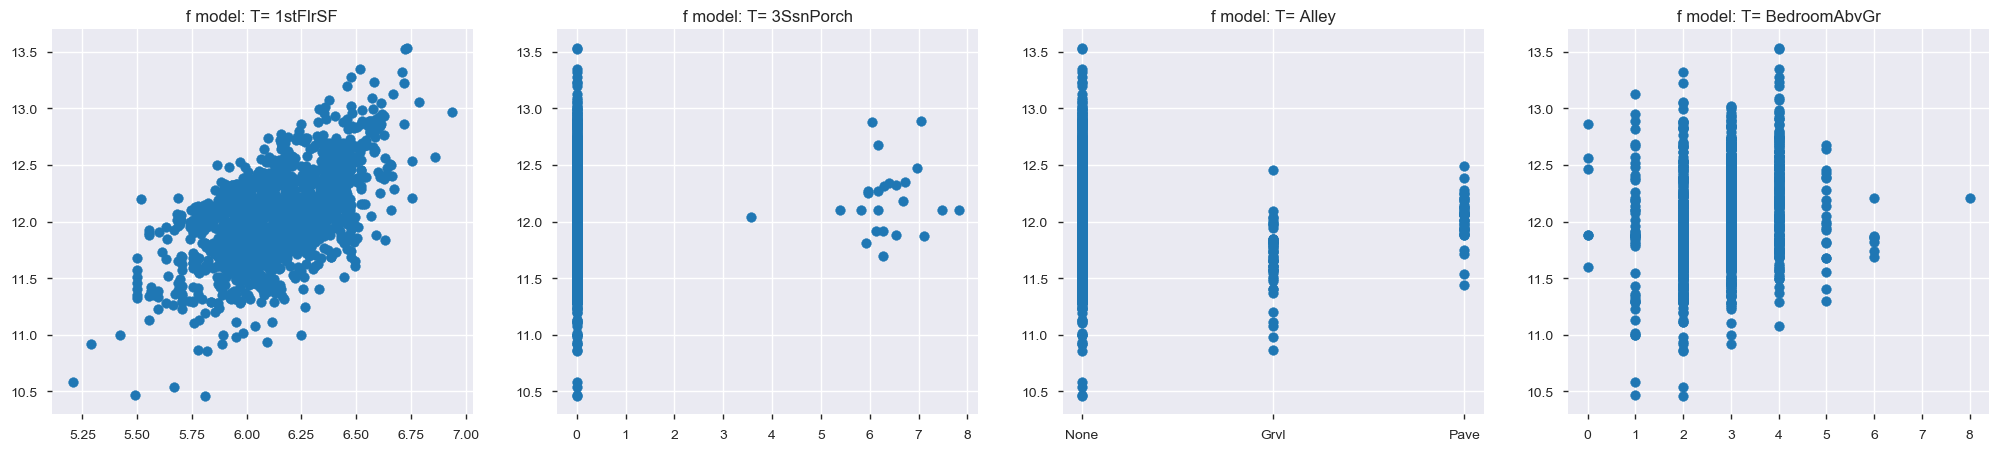

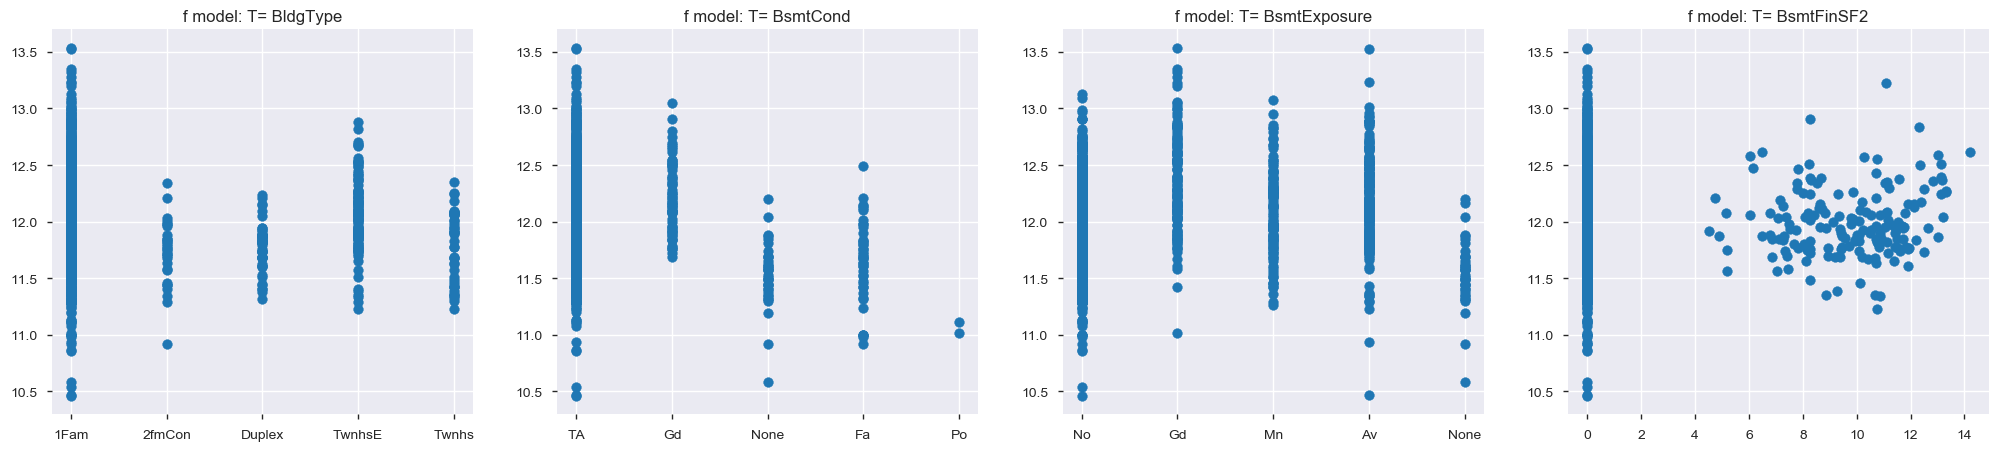

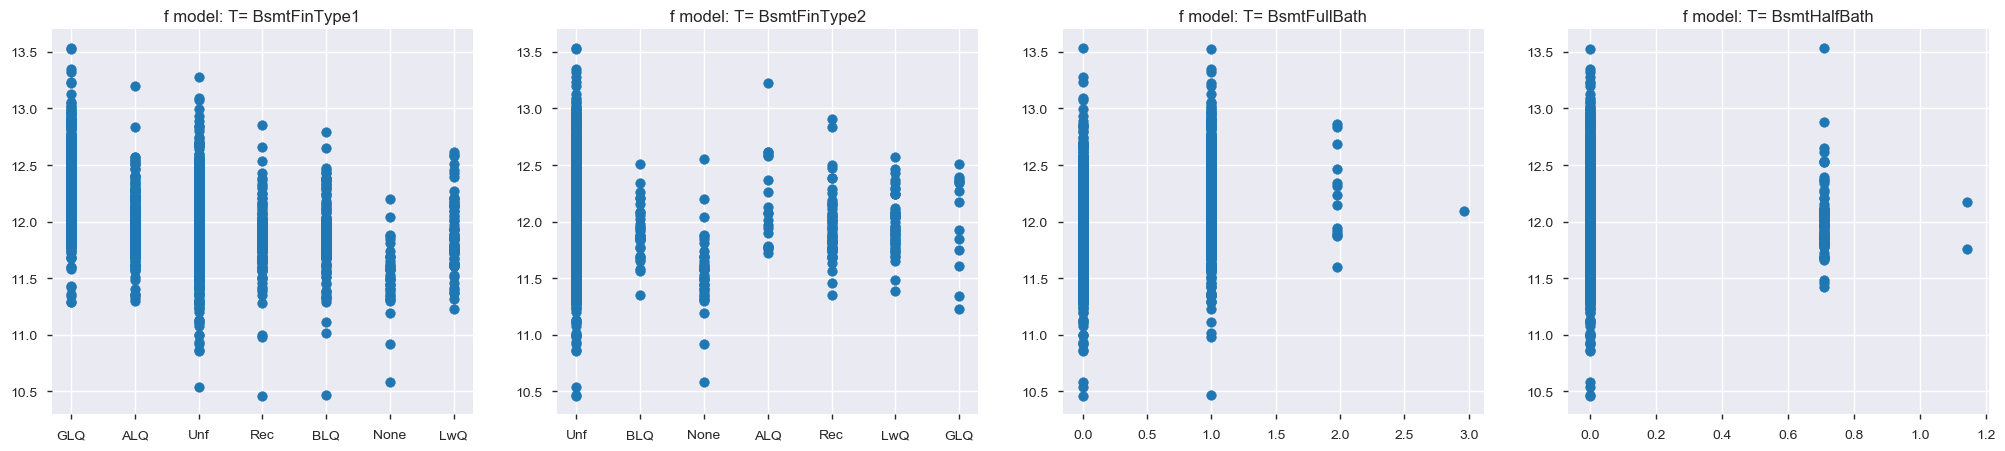

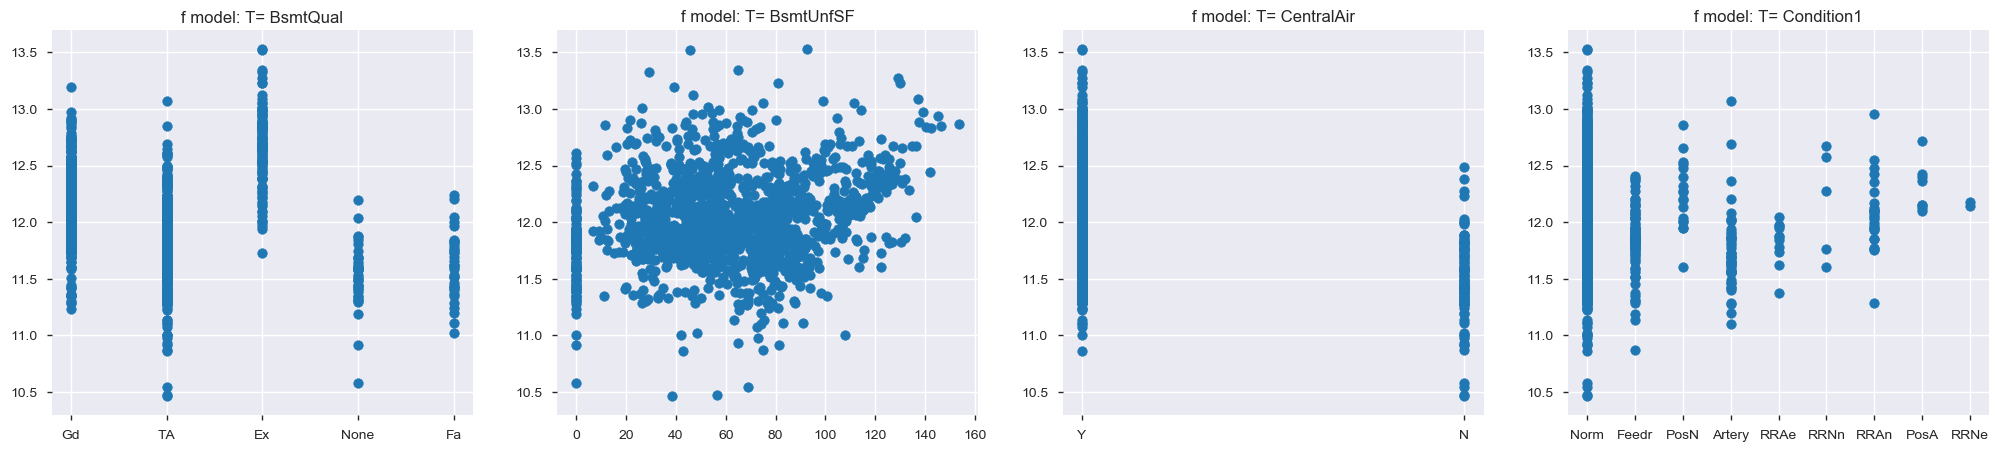

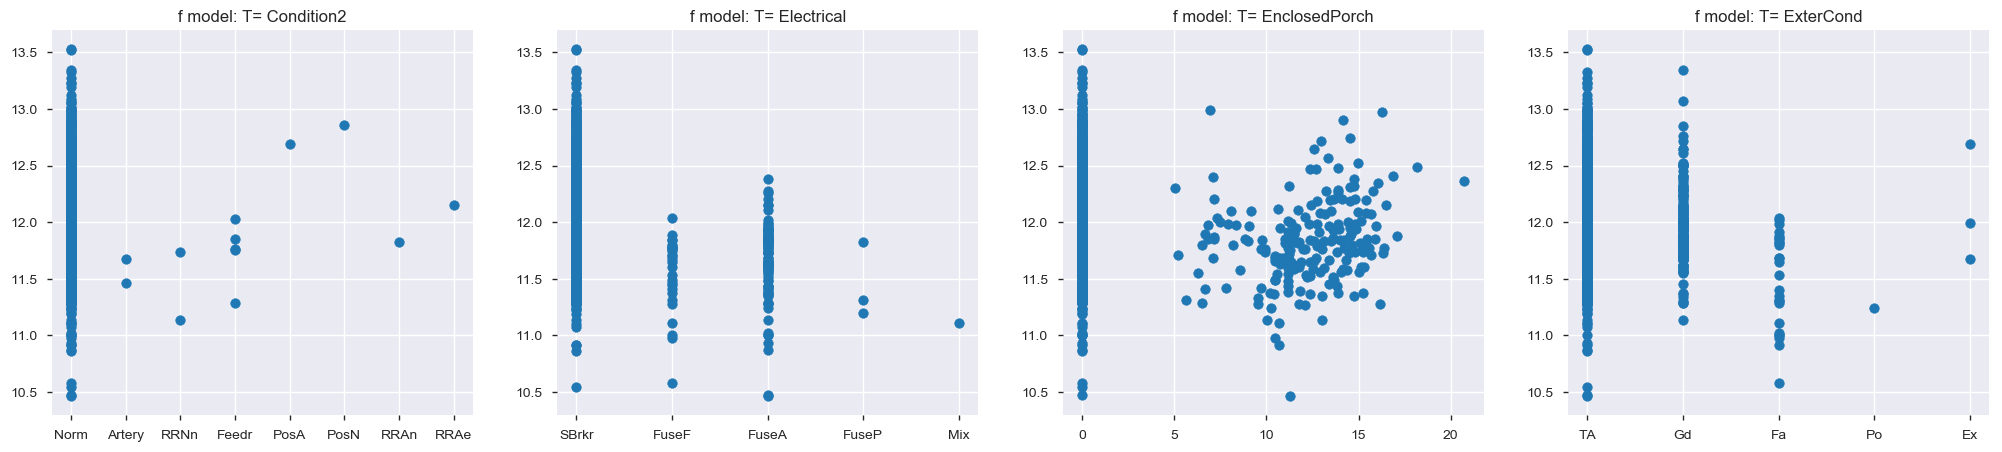

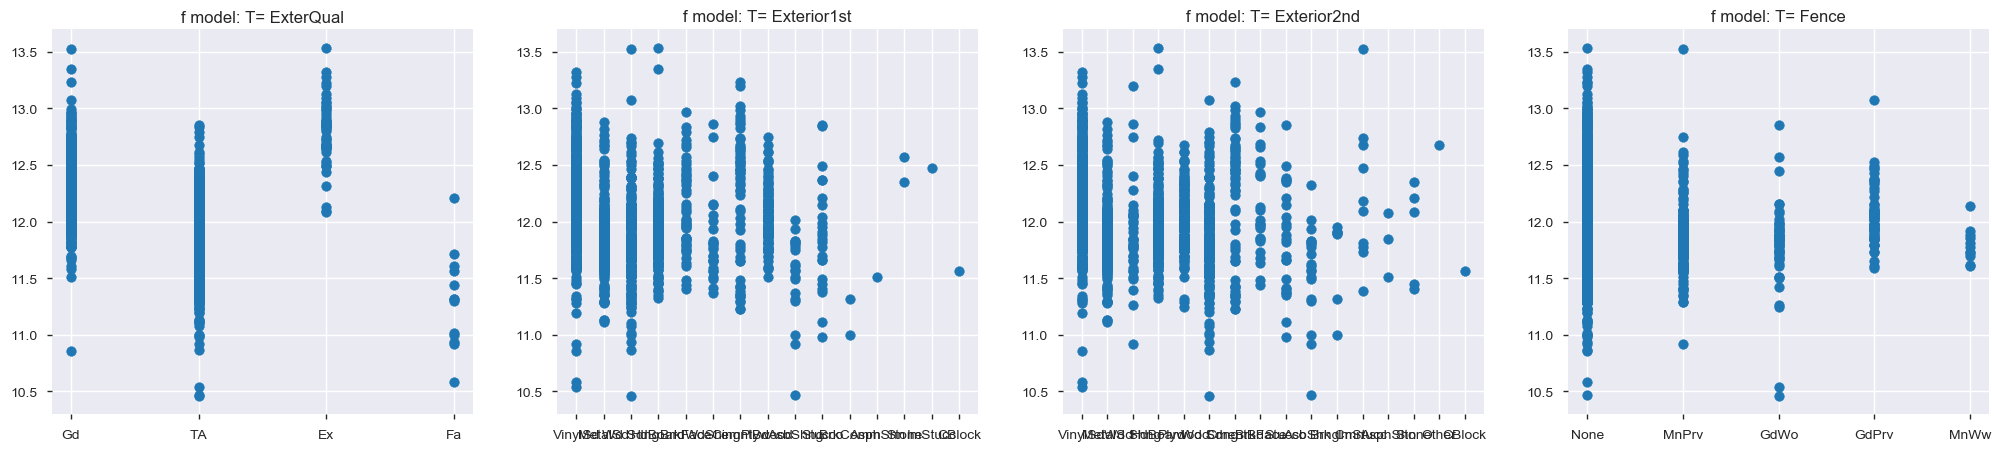

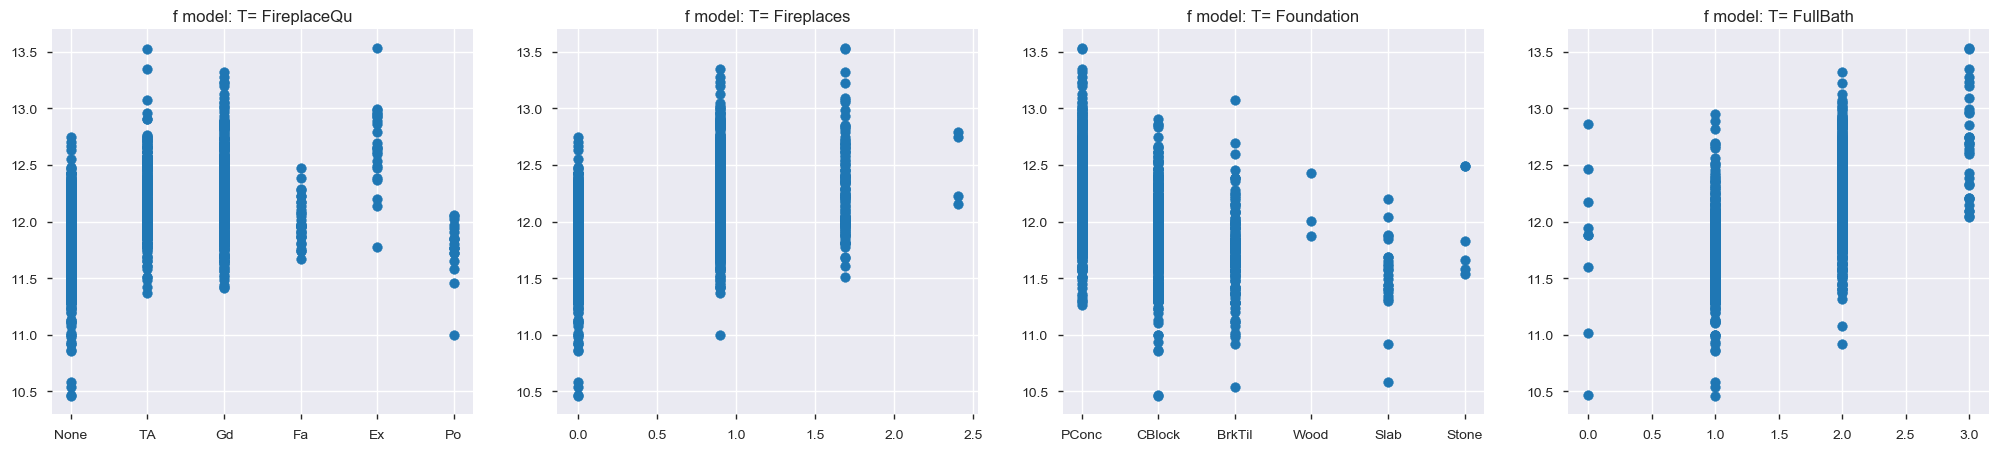

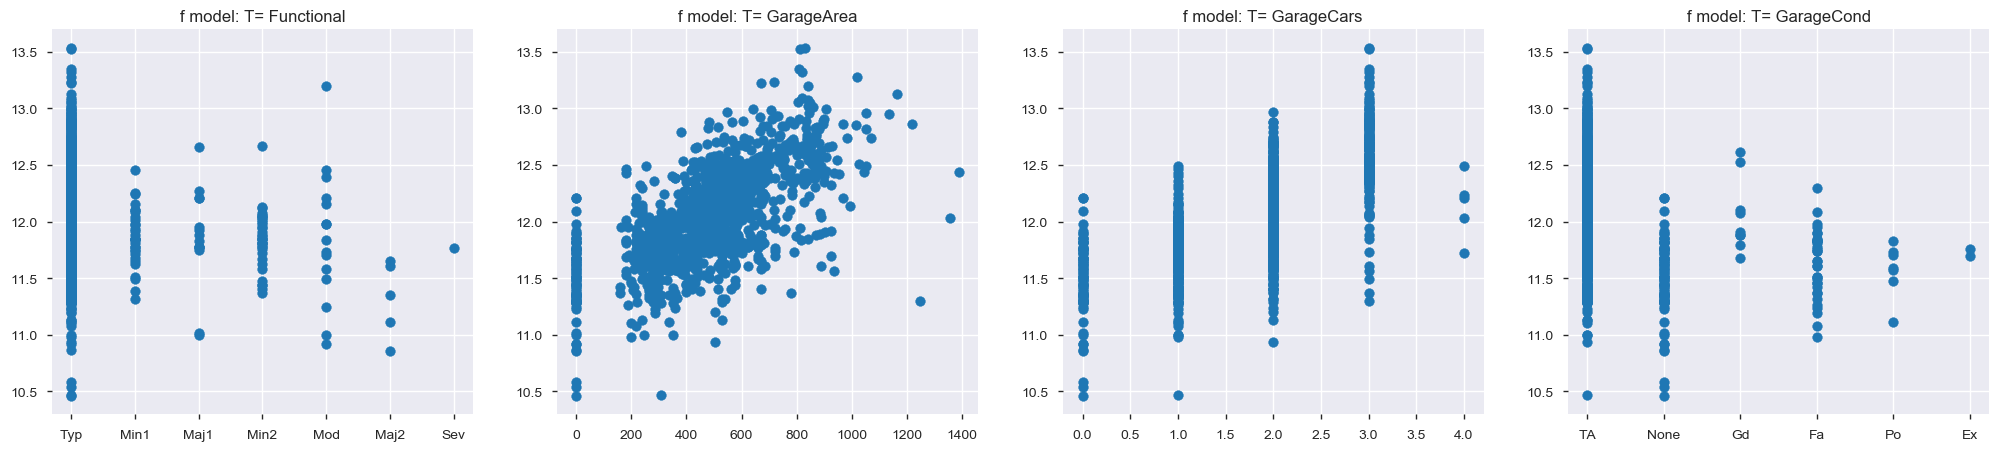

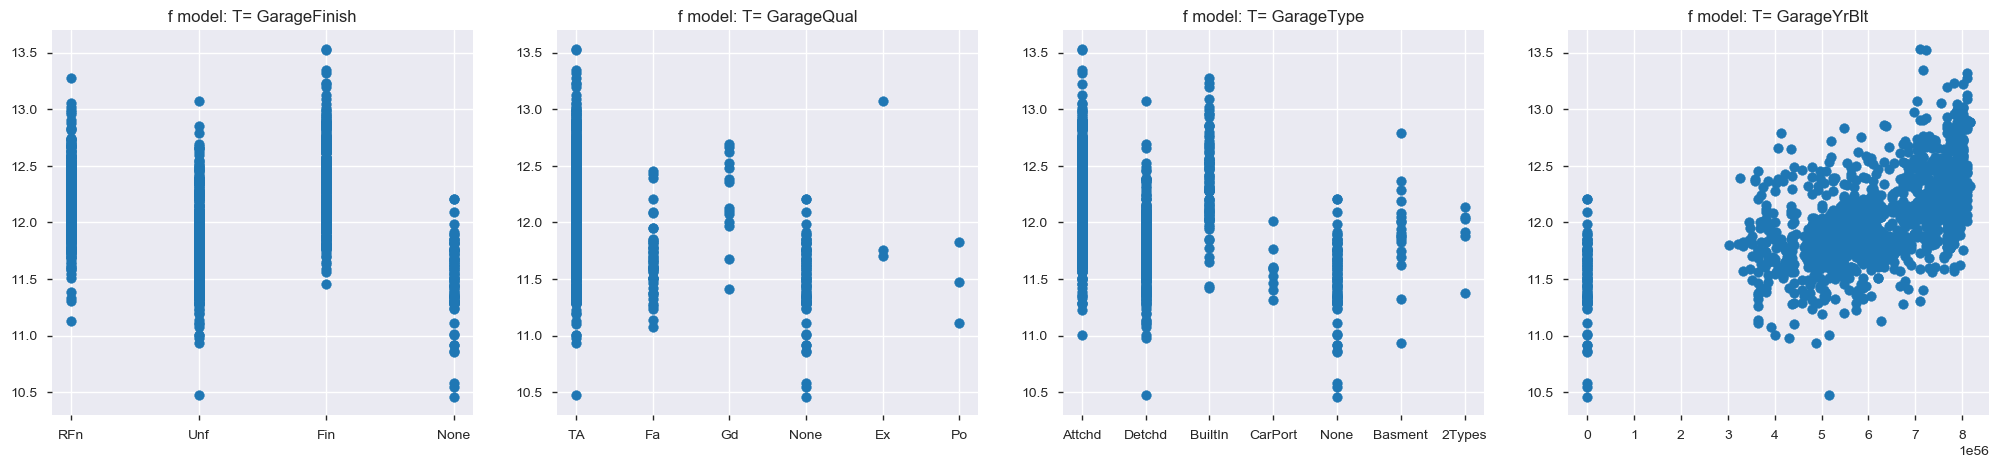

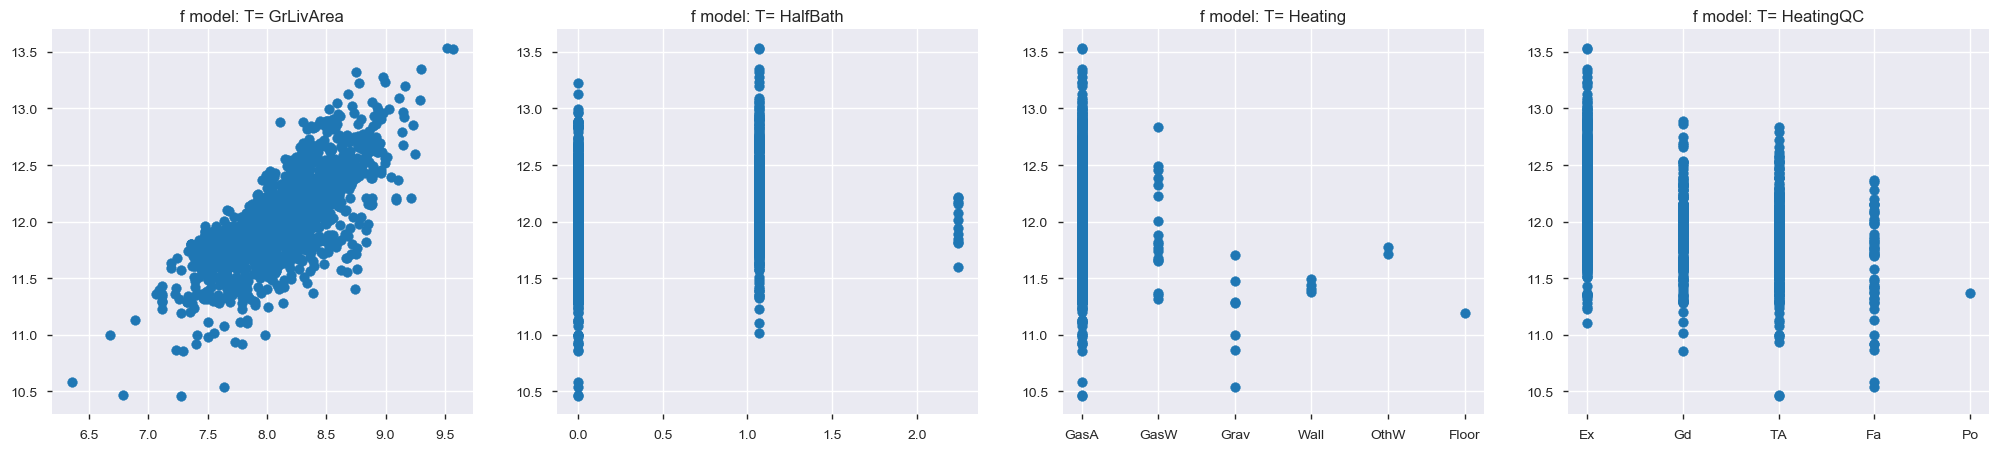

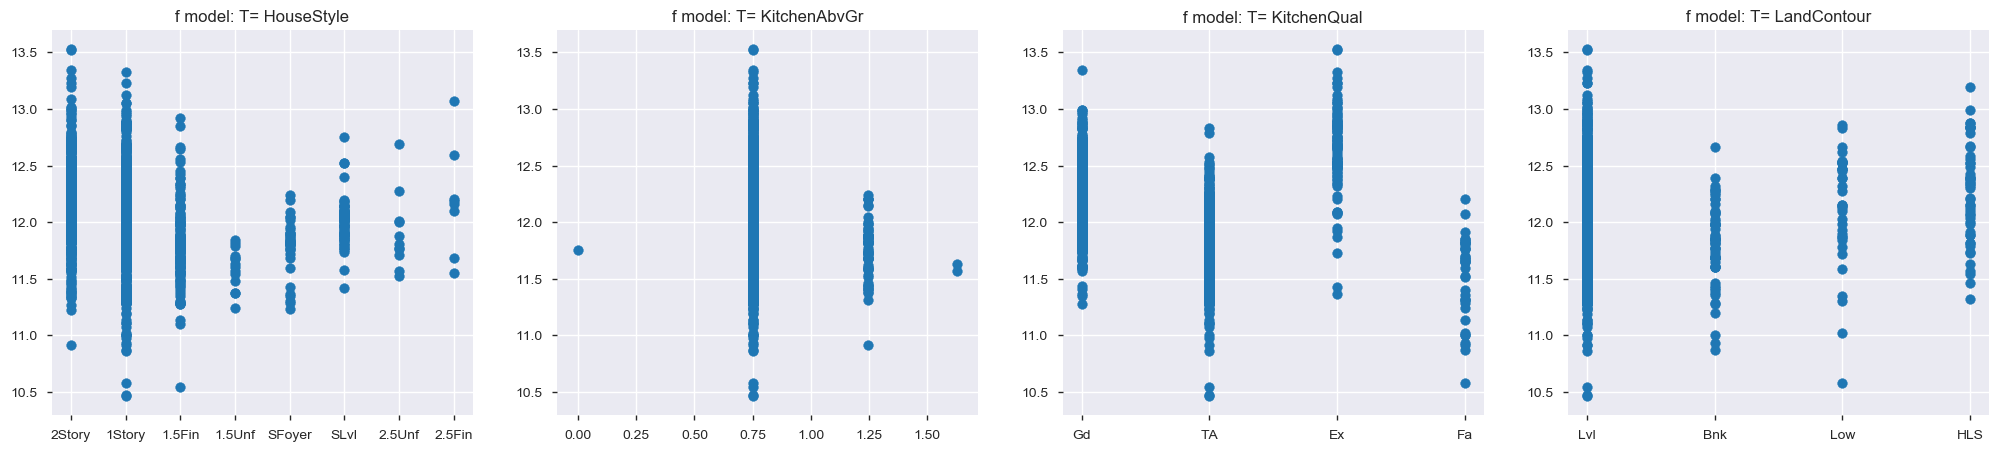

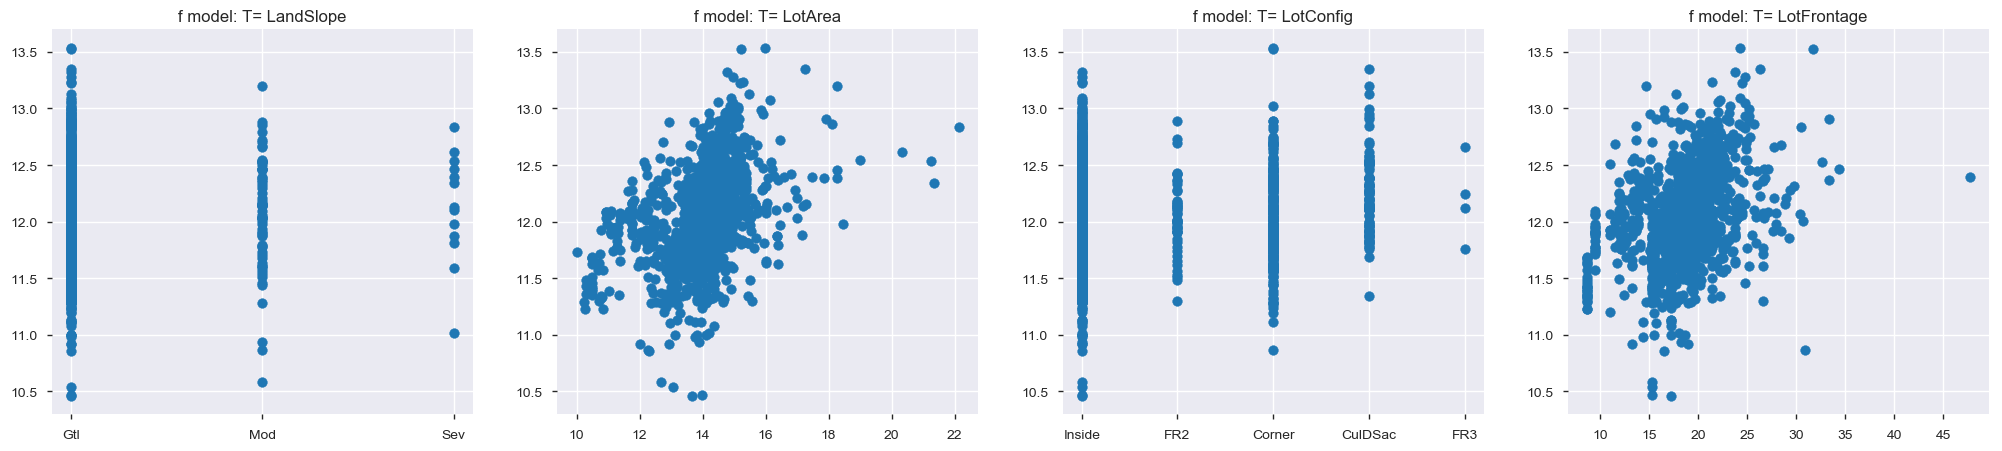

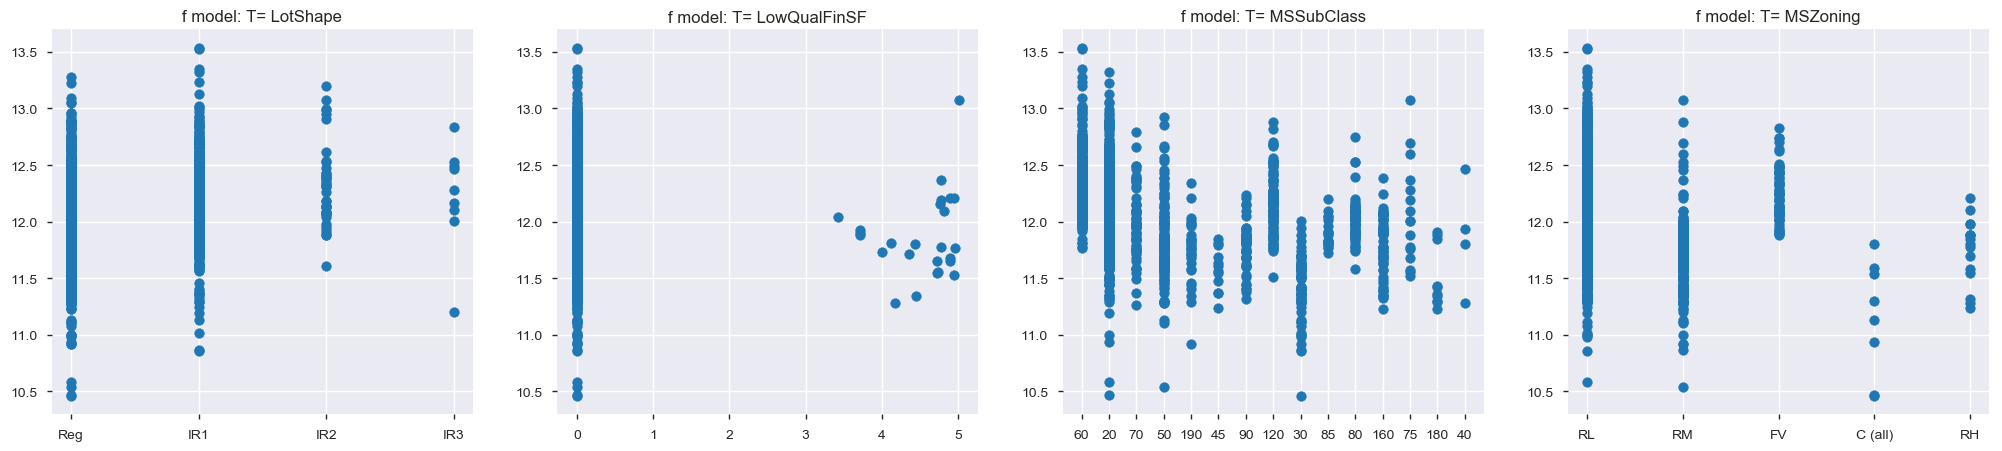

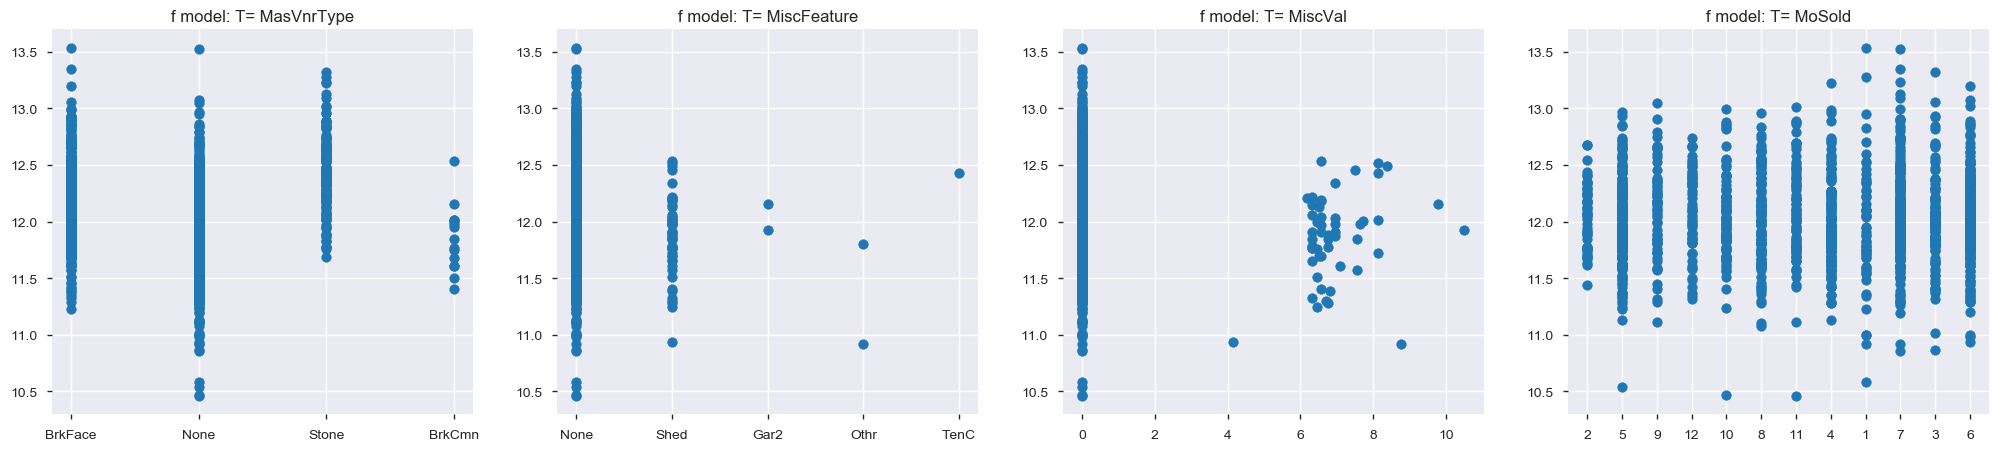

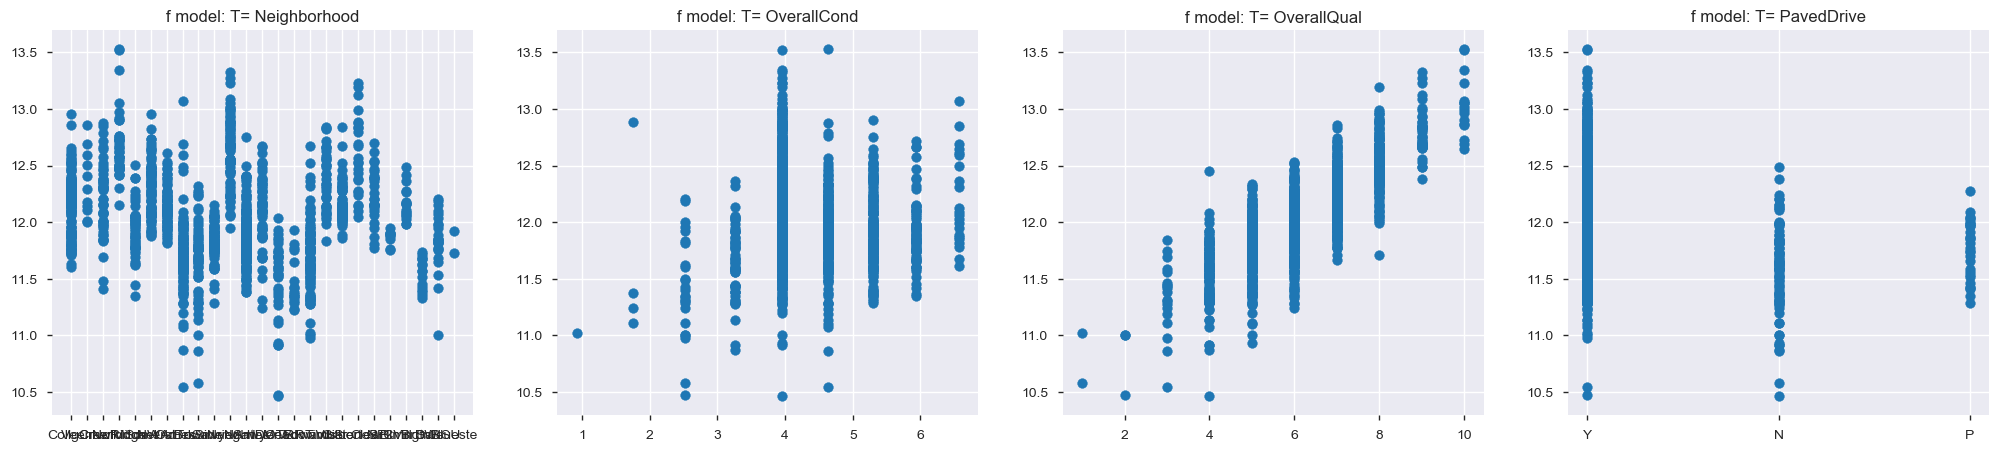

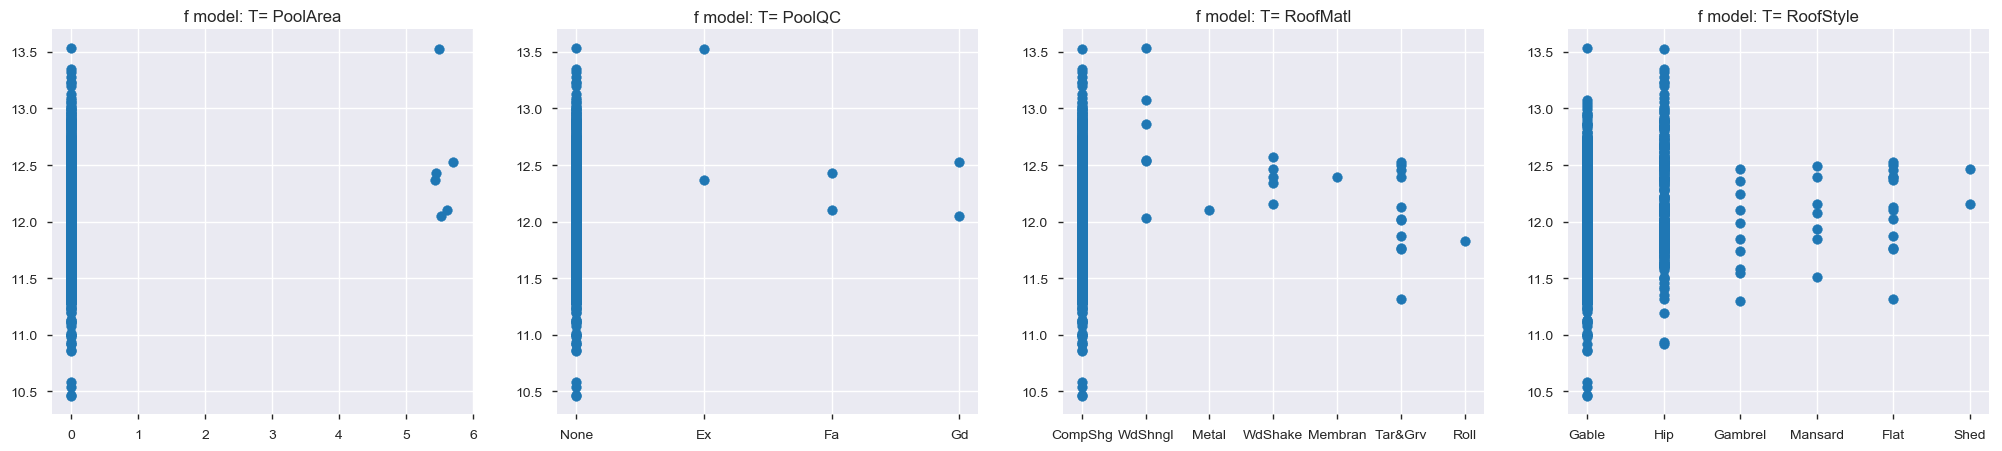

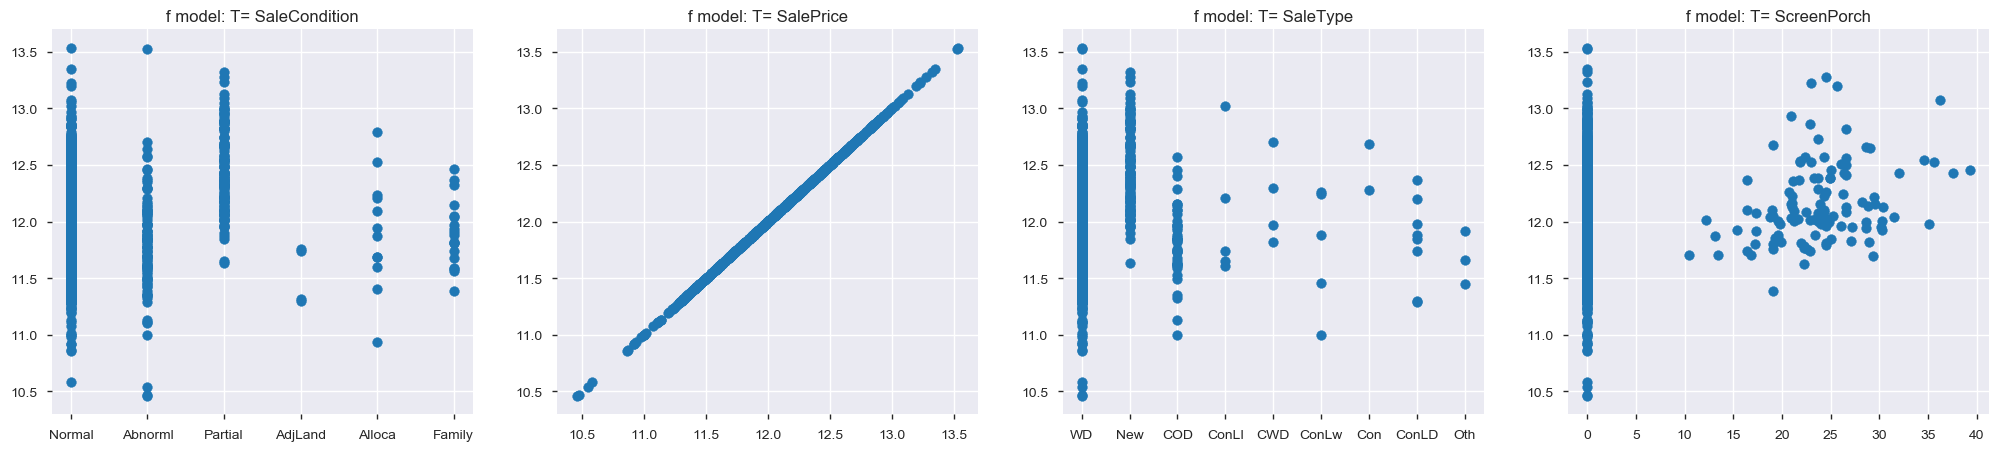

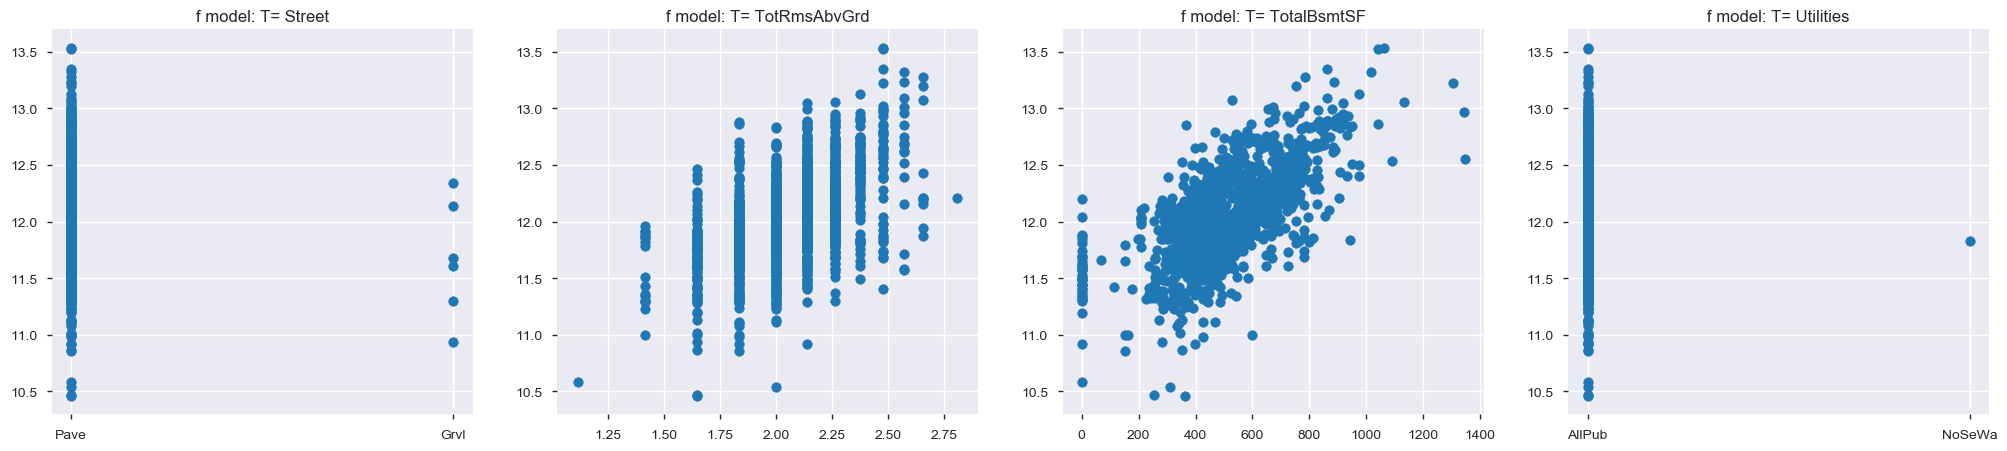

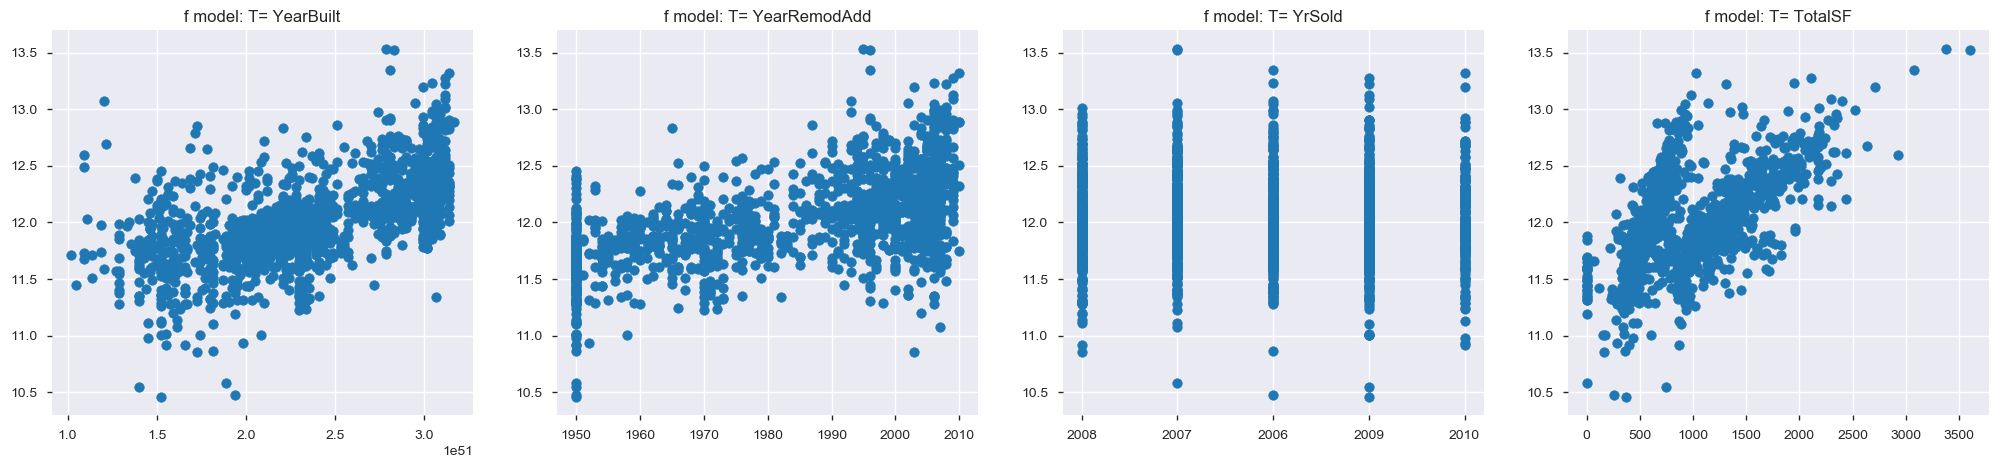

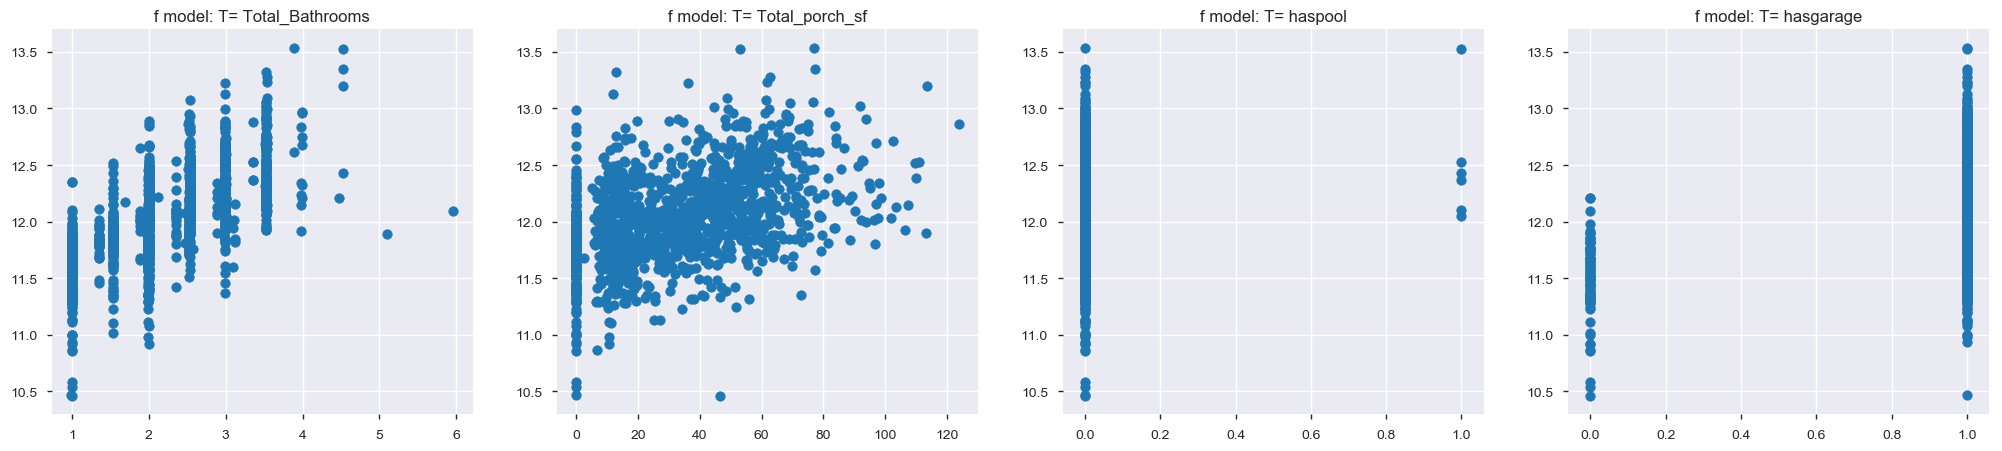

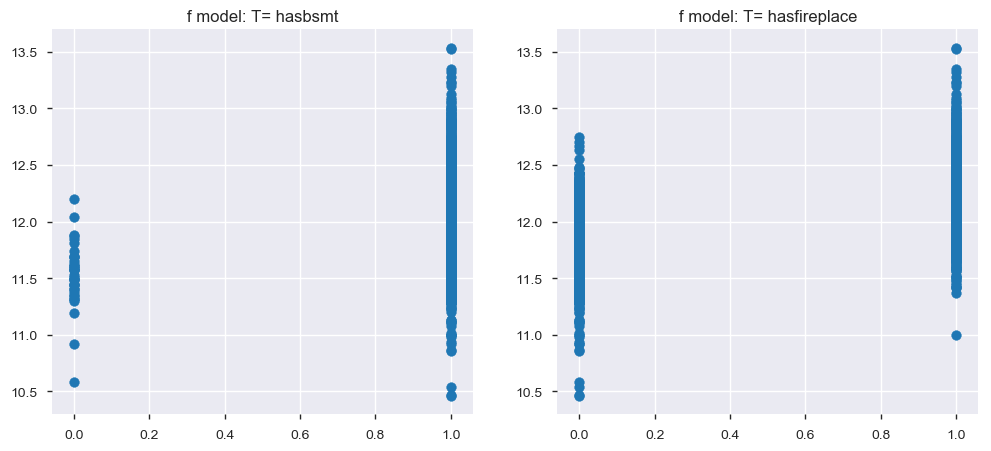

In [69]:
vars = data_features.columns
# vars = numerical_features
figures_per_time = 4
count = 0 
y = y_train
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

In [70]:
y_train = train['SalePrice']

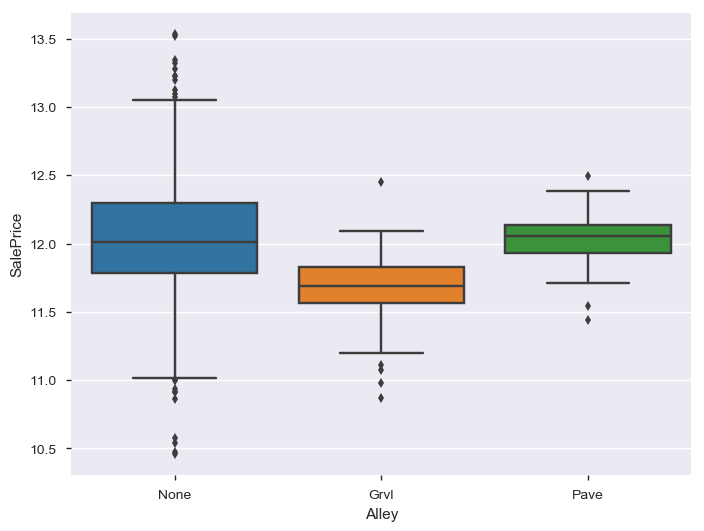

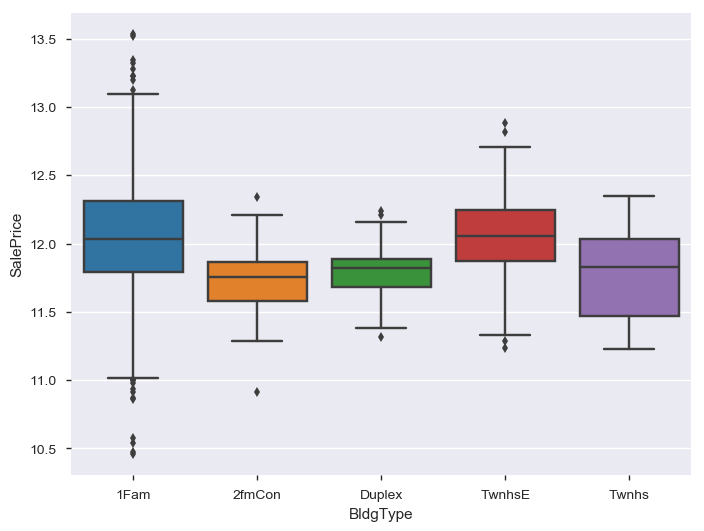

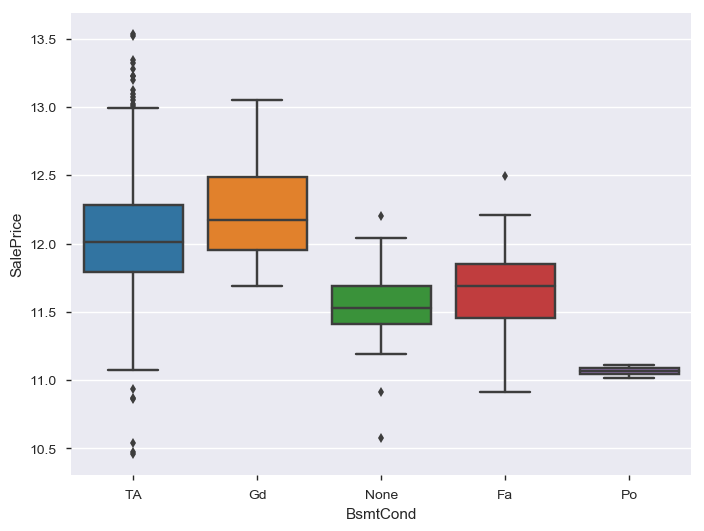

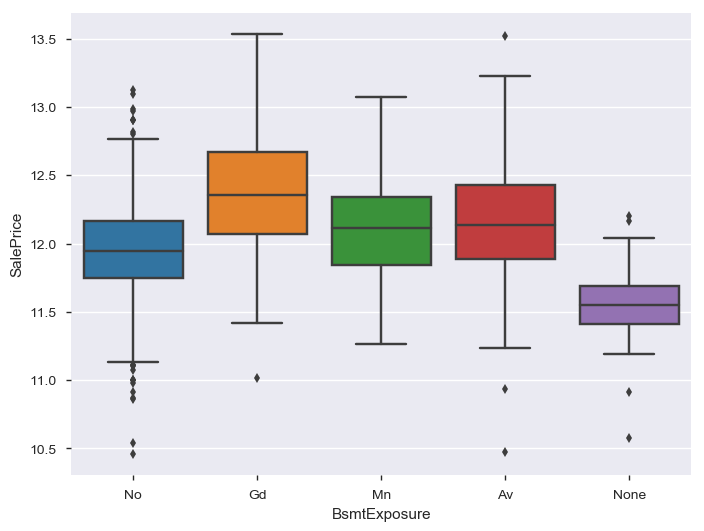

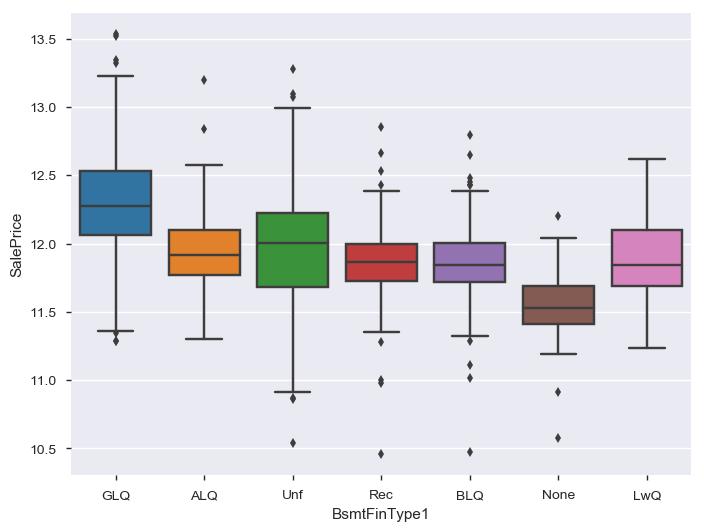

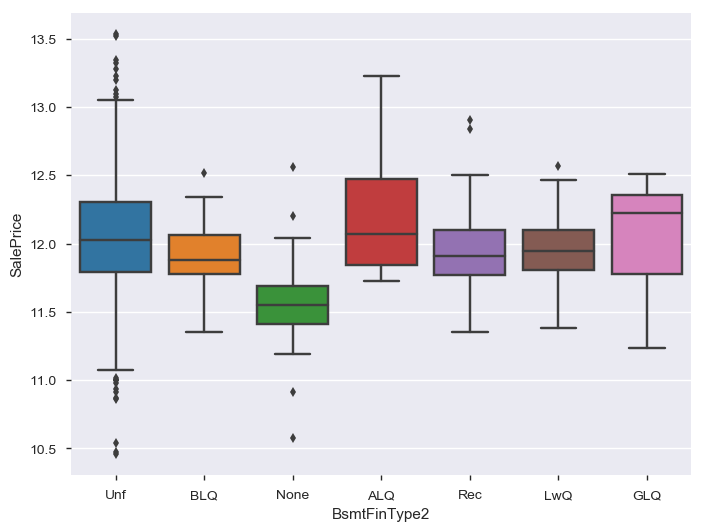

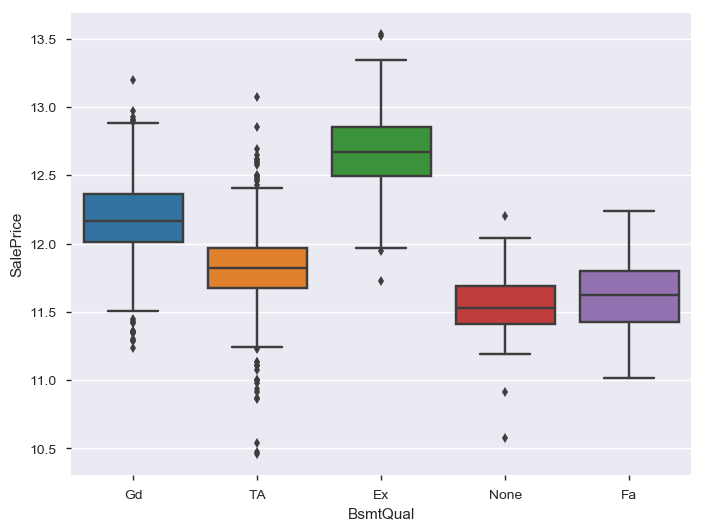

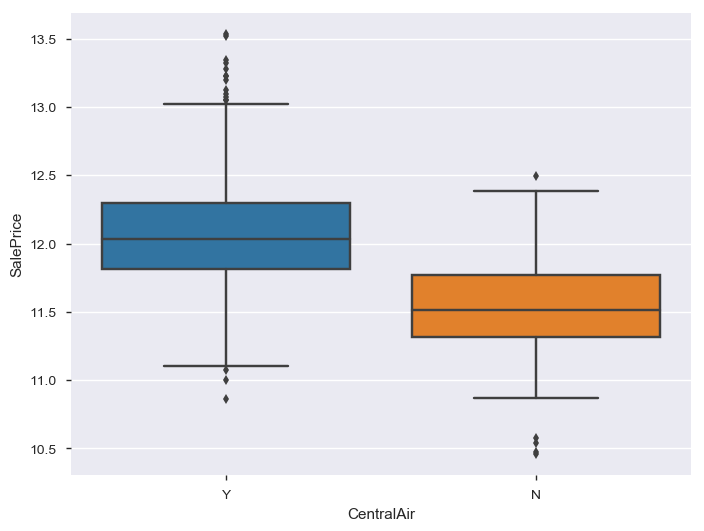

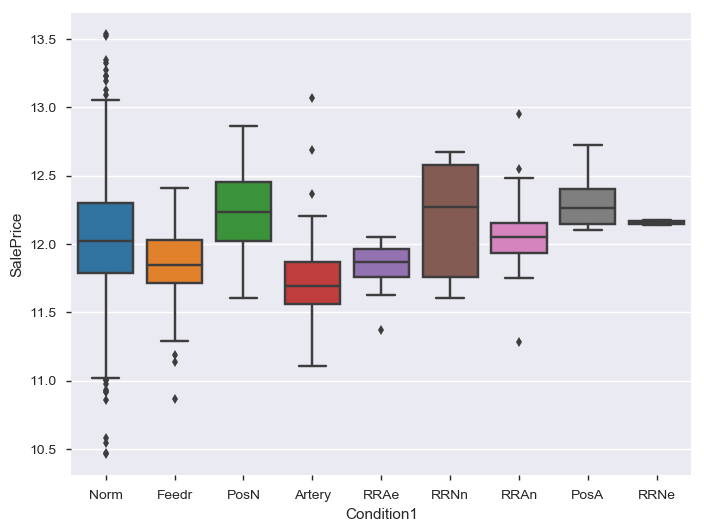

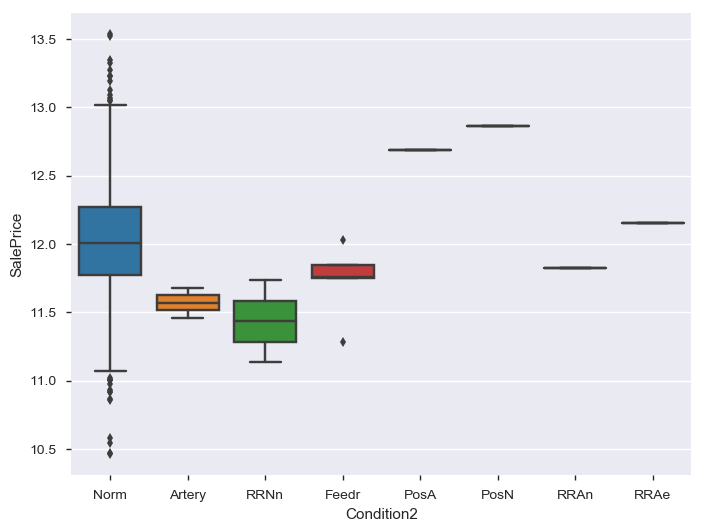

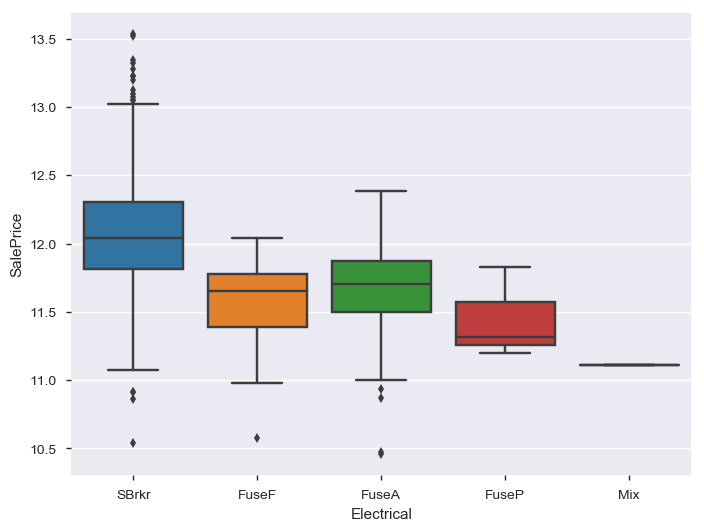

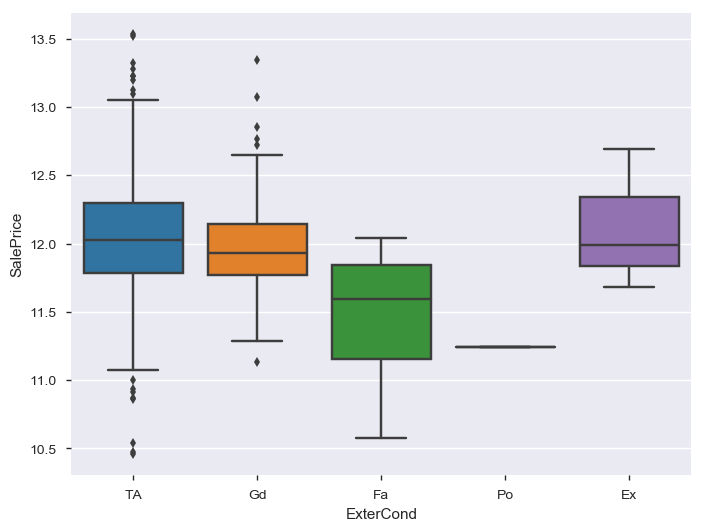

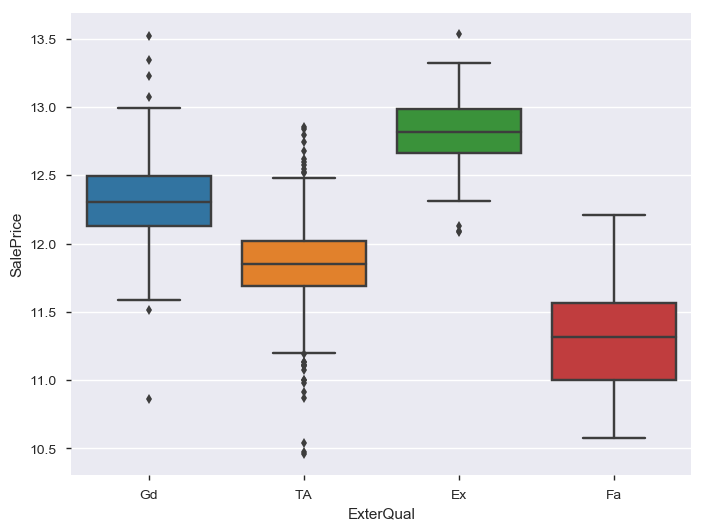

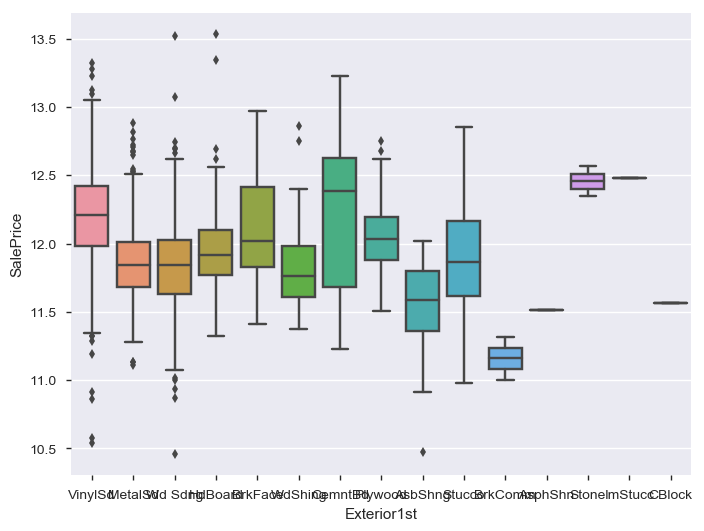

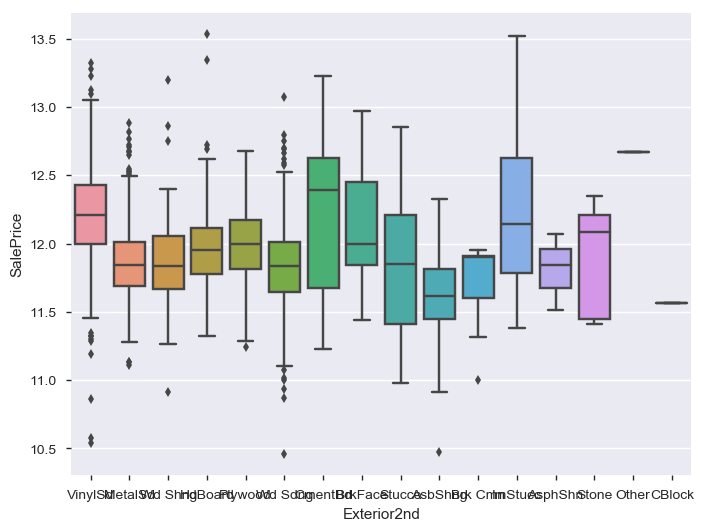

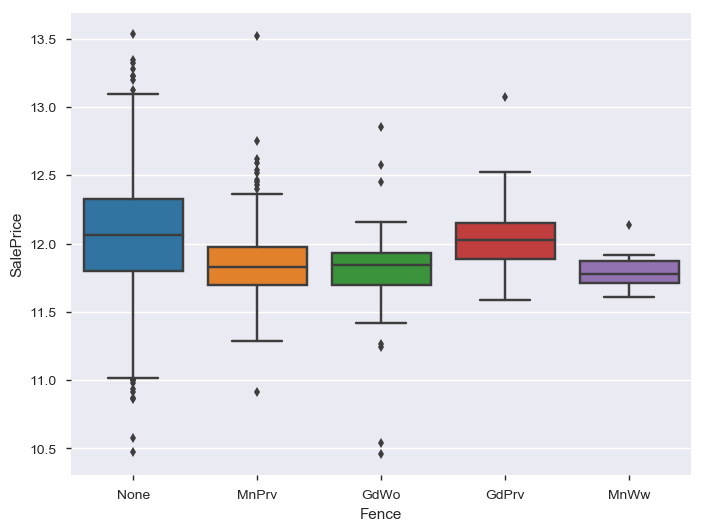

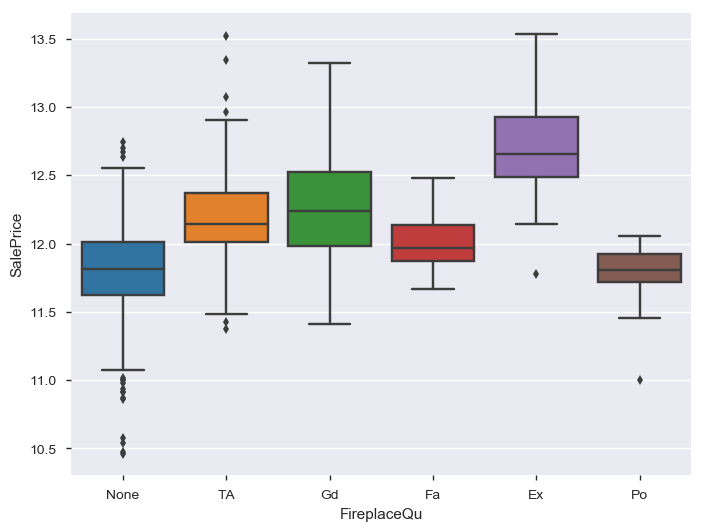

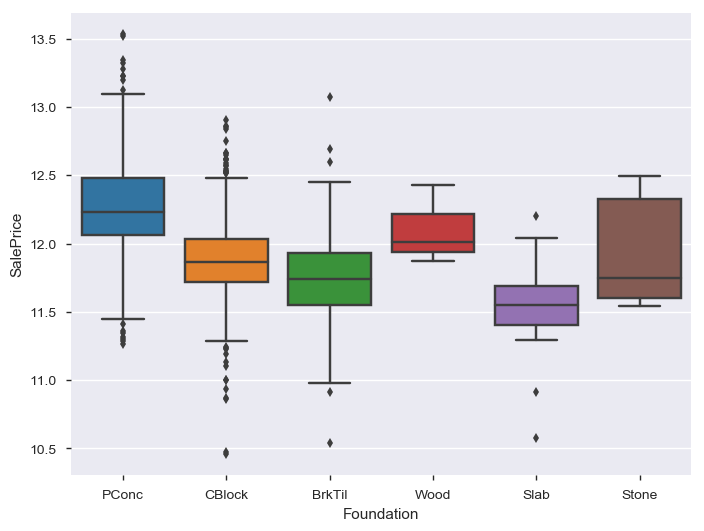

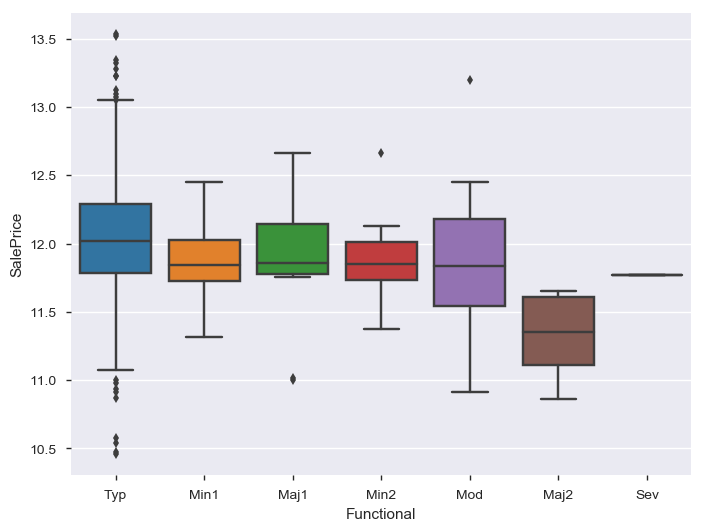

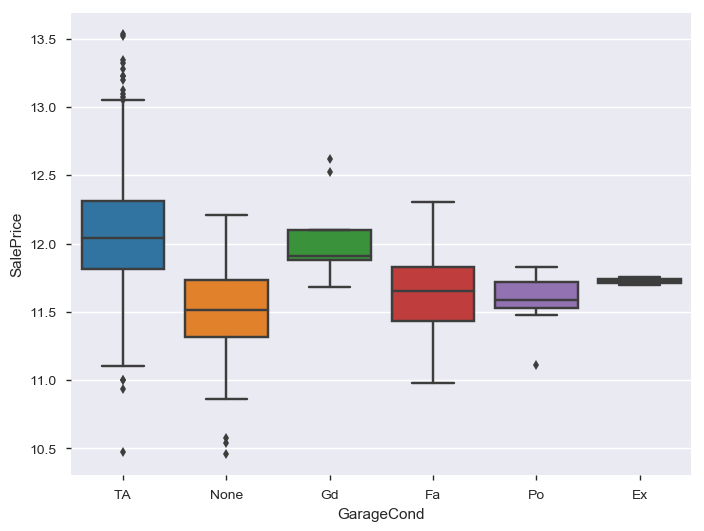

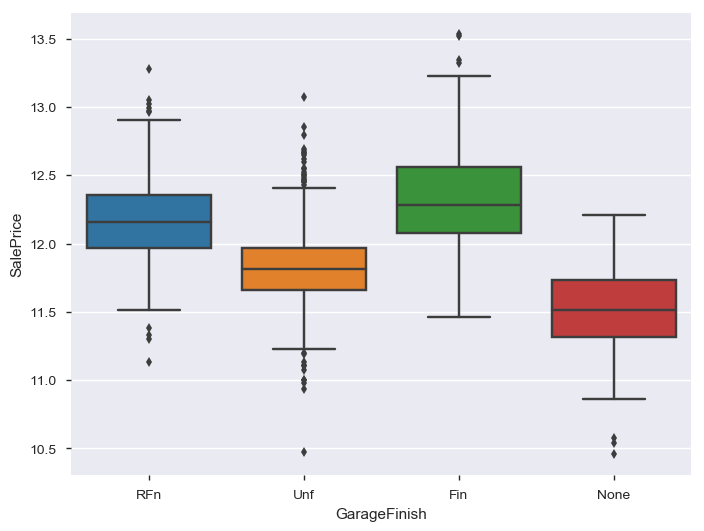

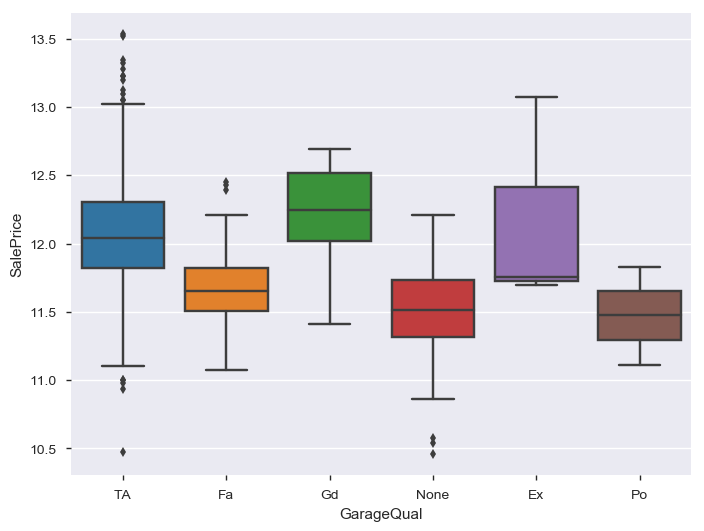

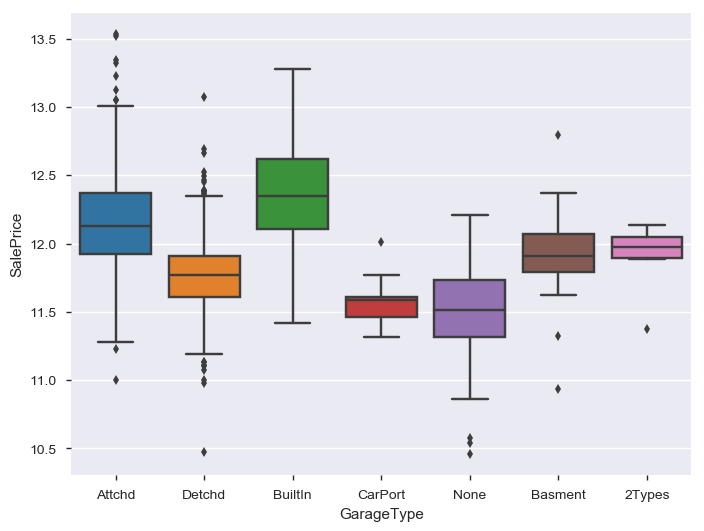

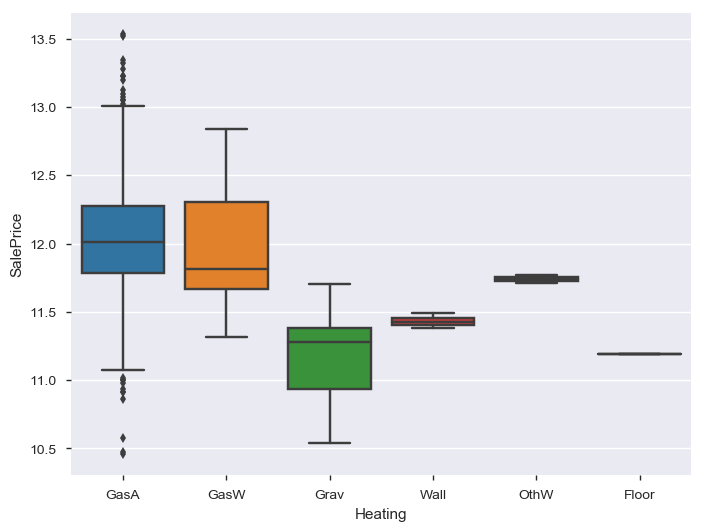

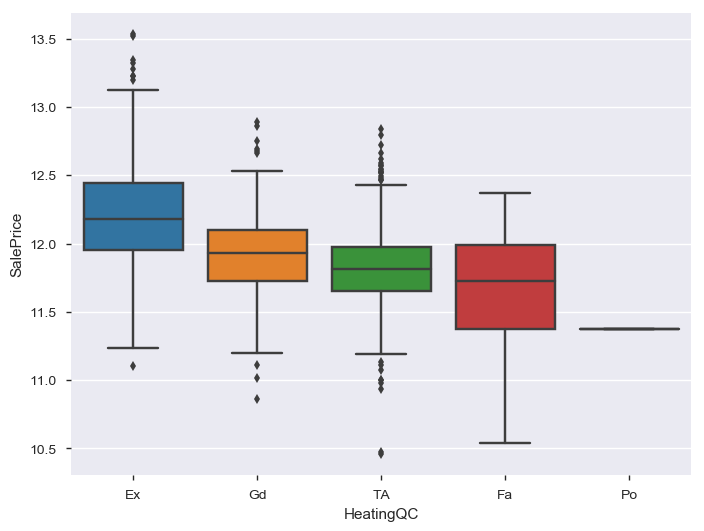

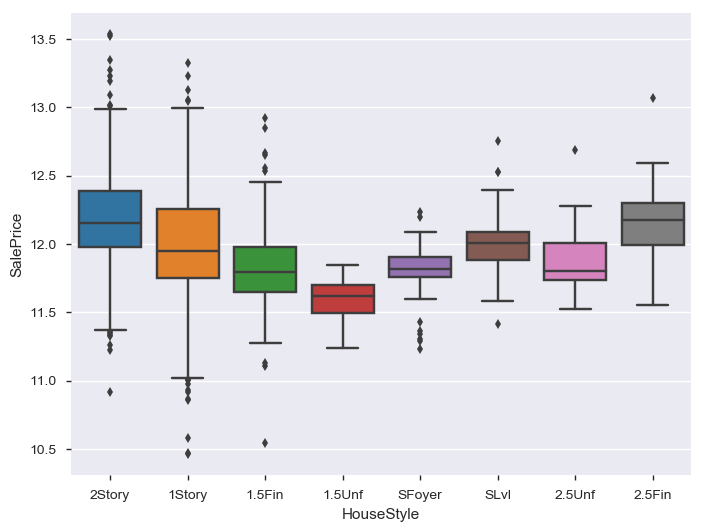

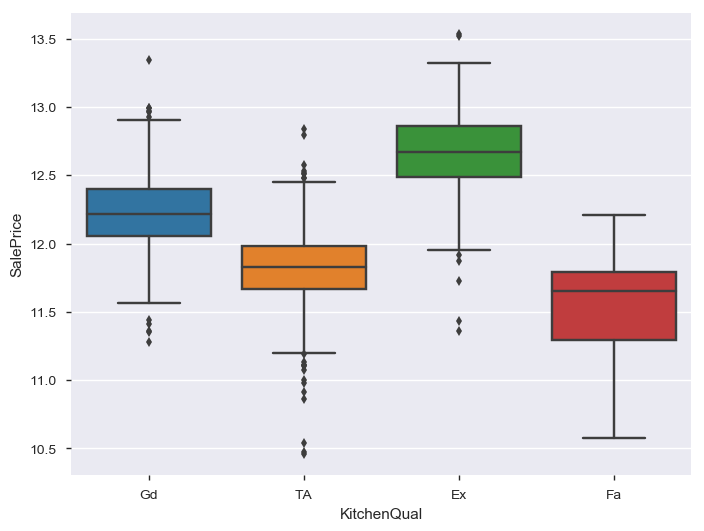

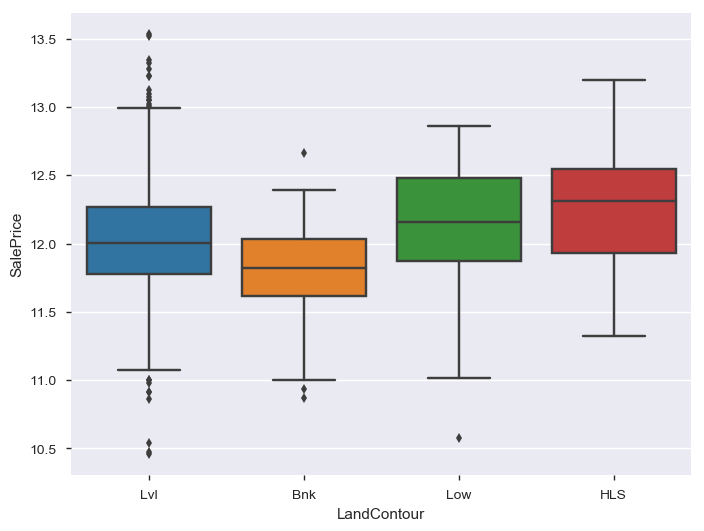

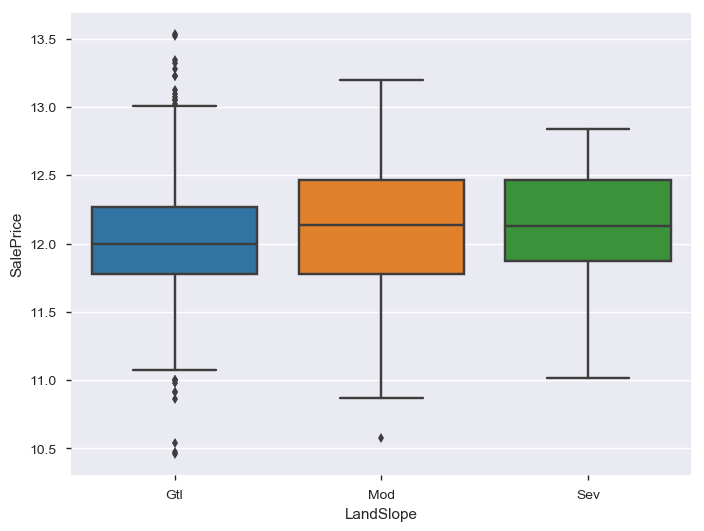

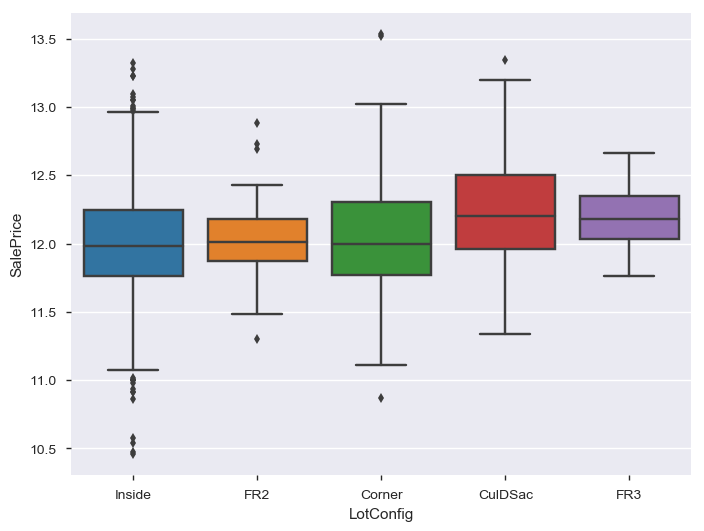

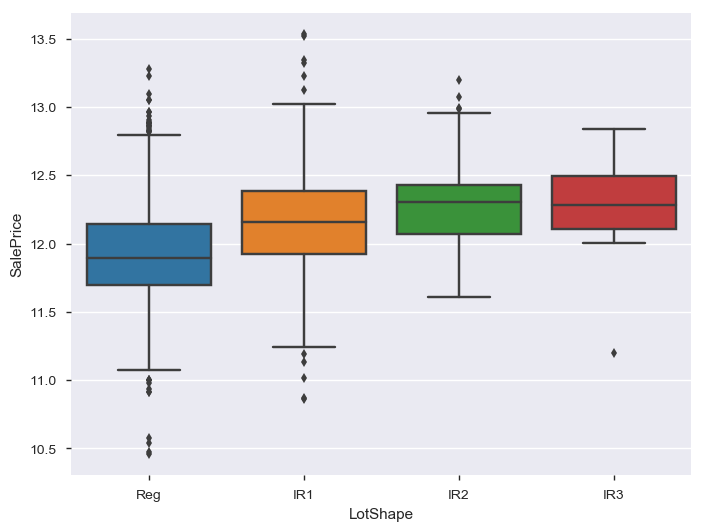

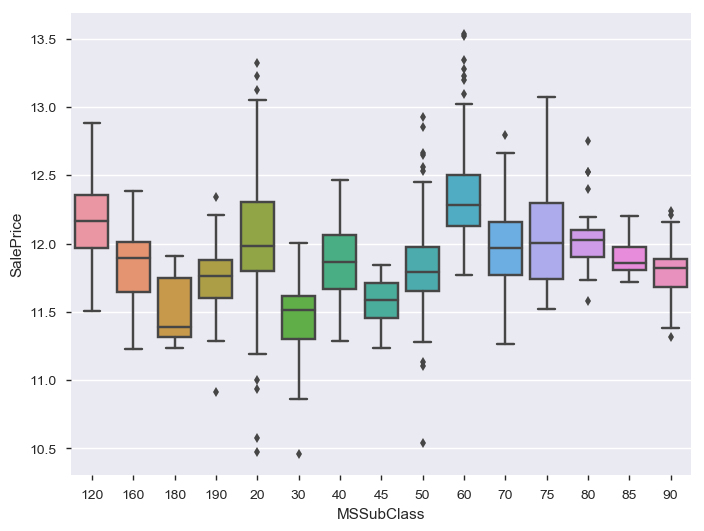

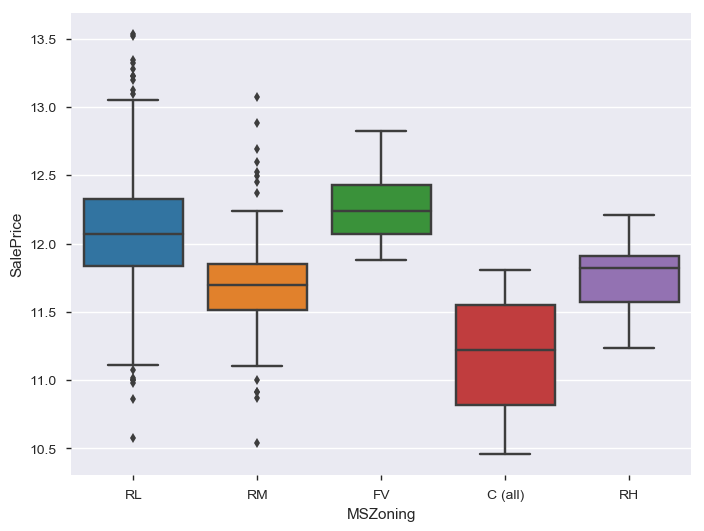

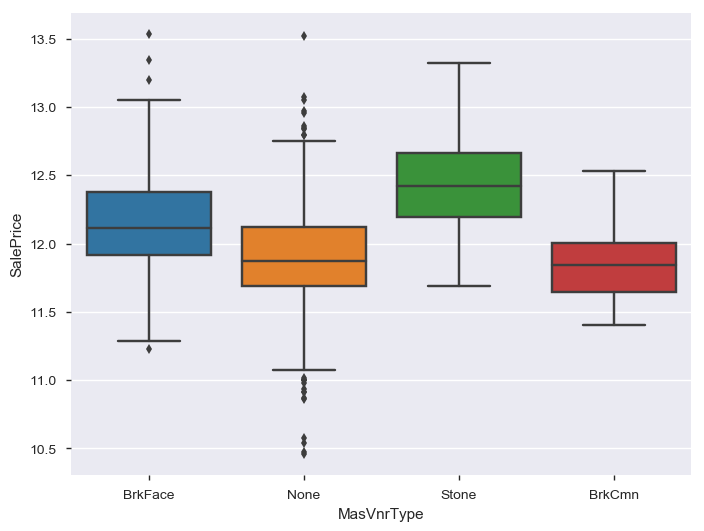

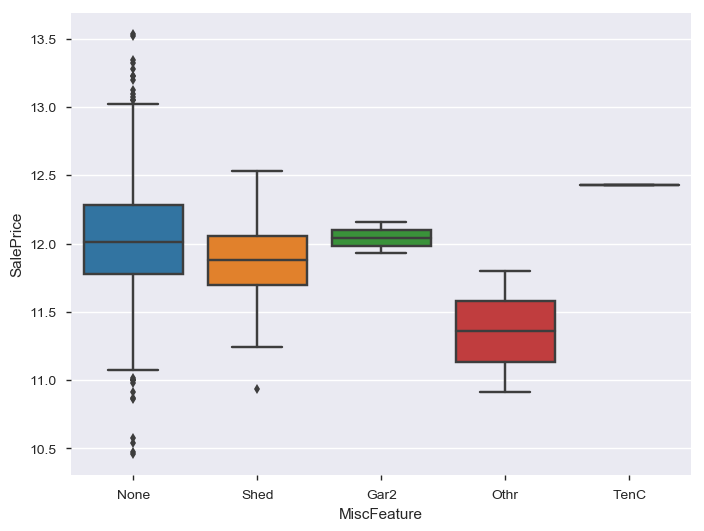

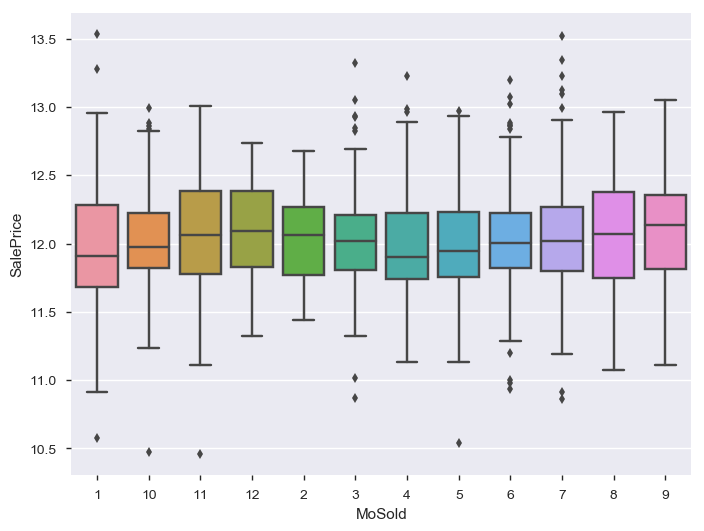

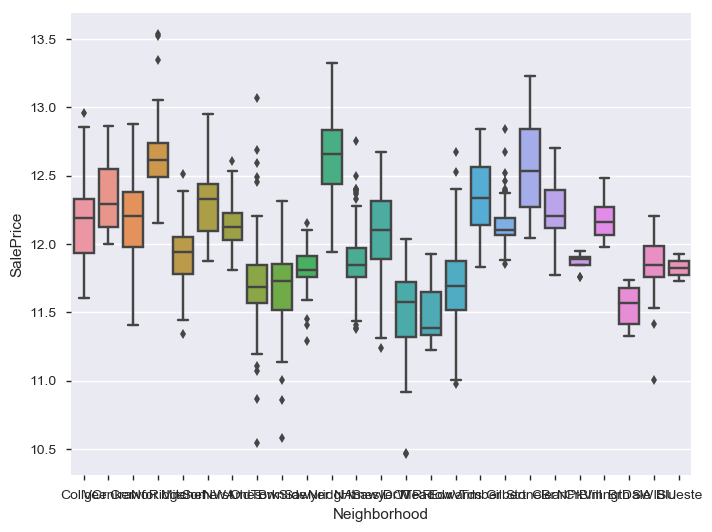

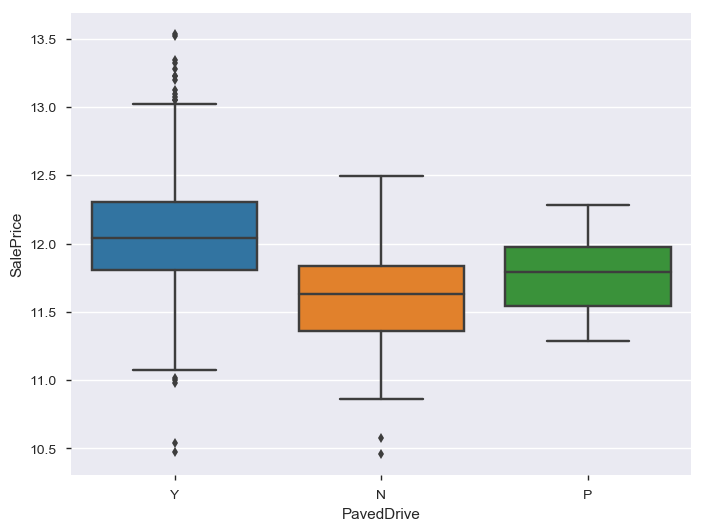

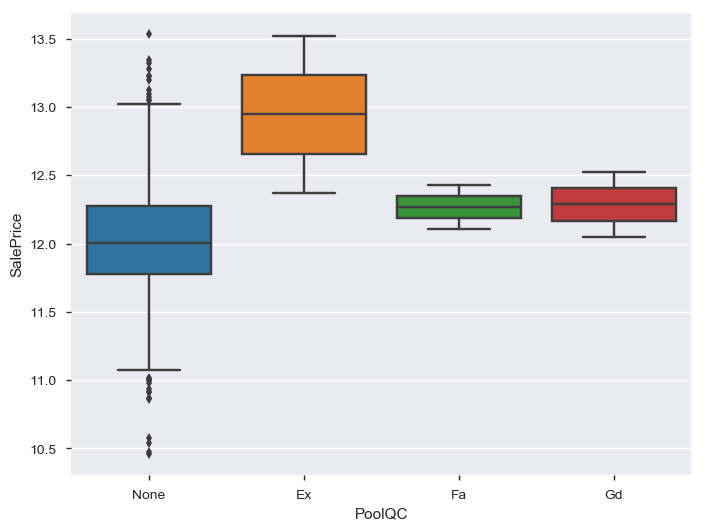

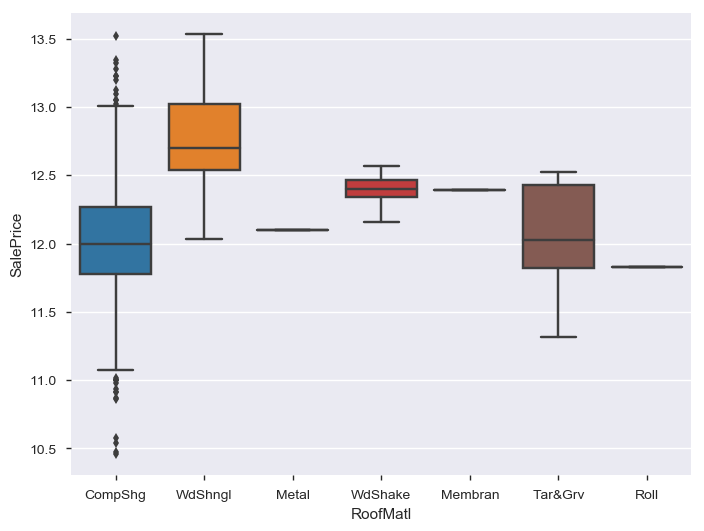

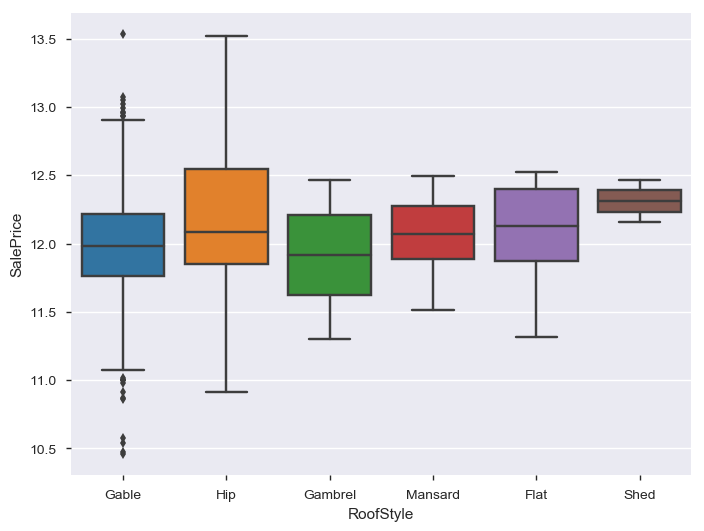

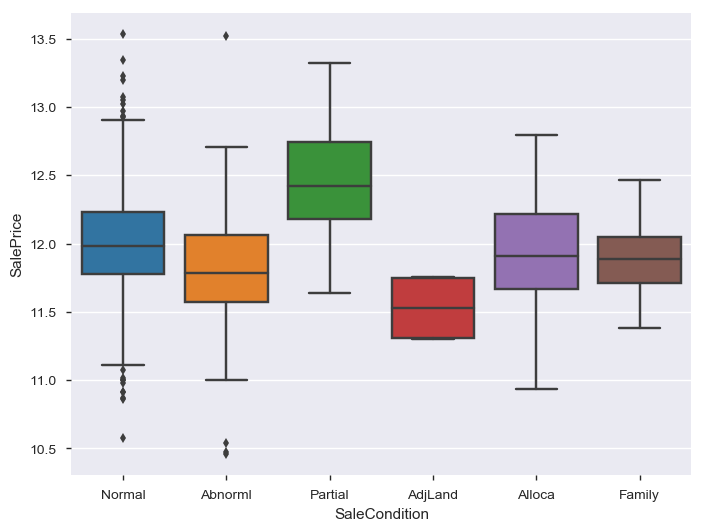

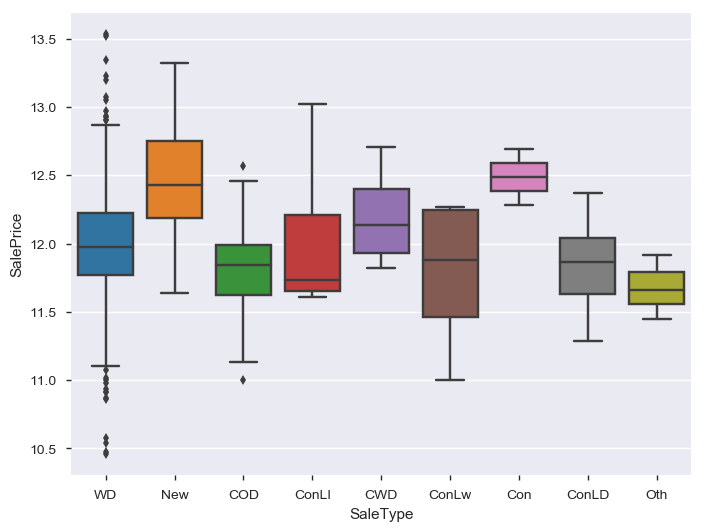

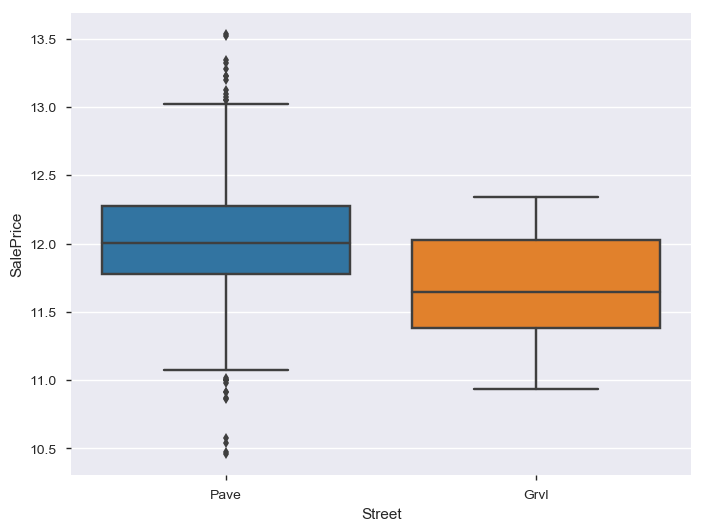

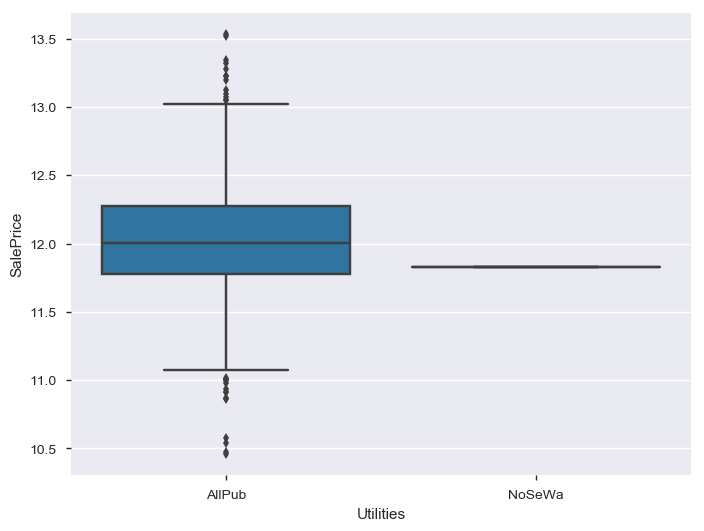

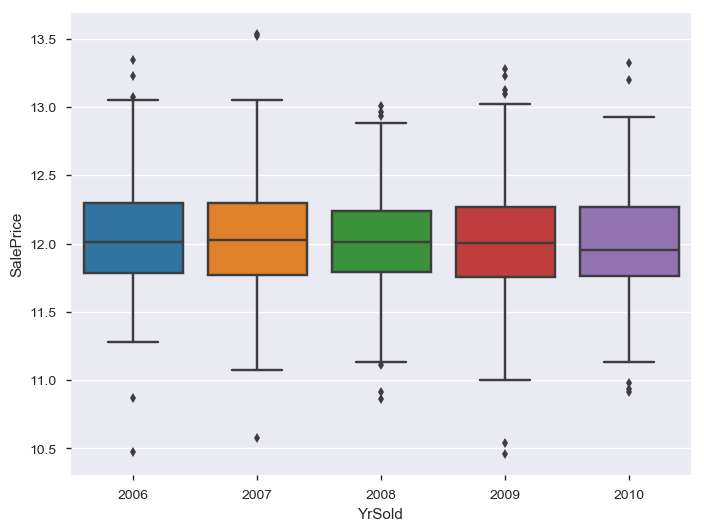

In [71]:
# vars_box = ['OverallQual','YearBuilt','BedroomAbvGr']
vars_box = feat_cat
for var in vars_box:
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)

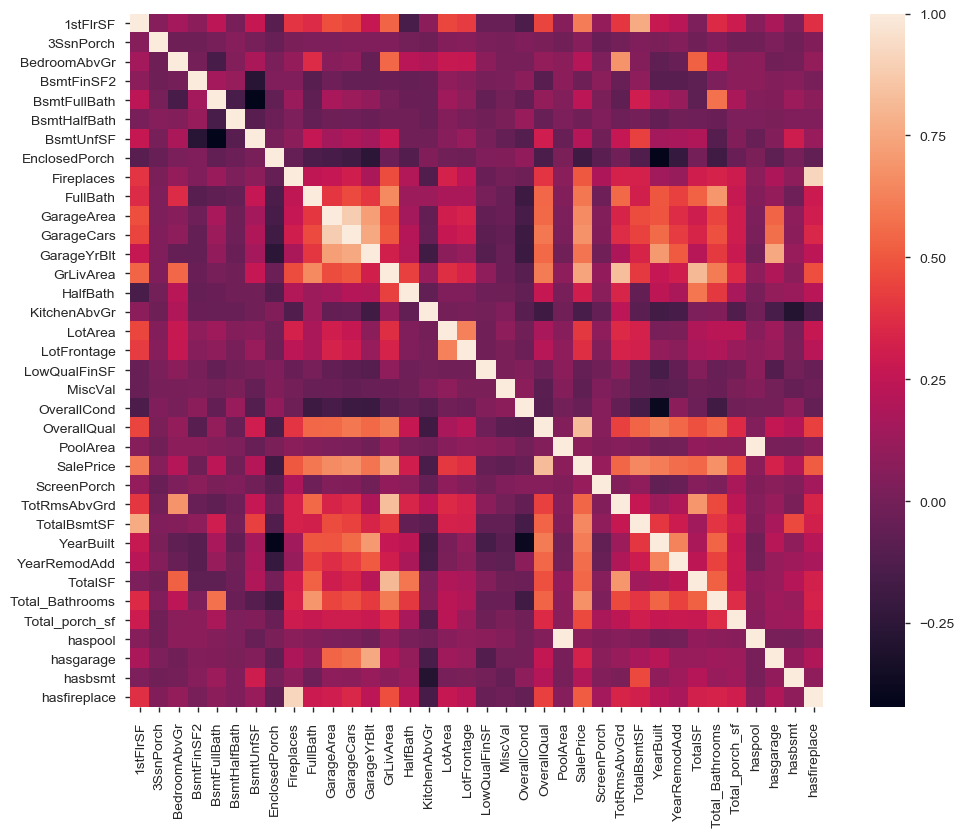

In [72]:
# Complete numerical correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

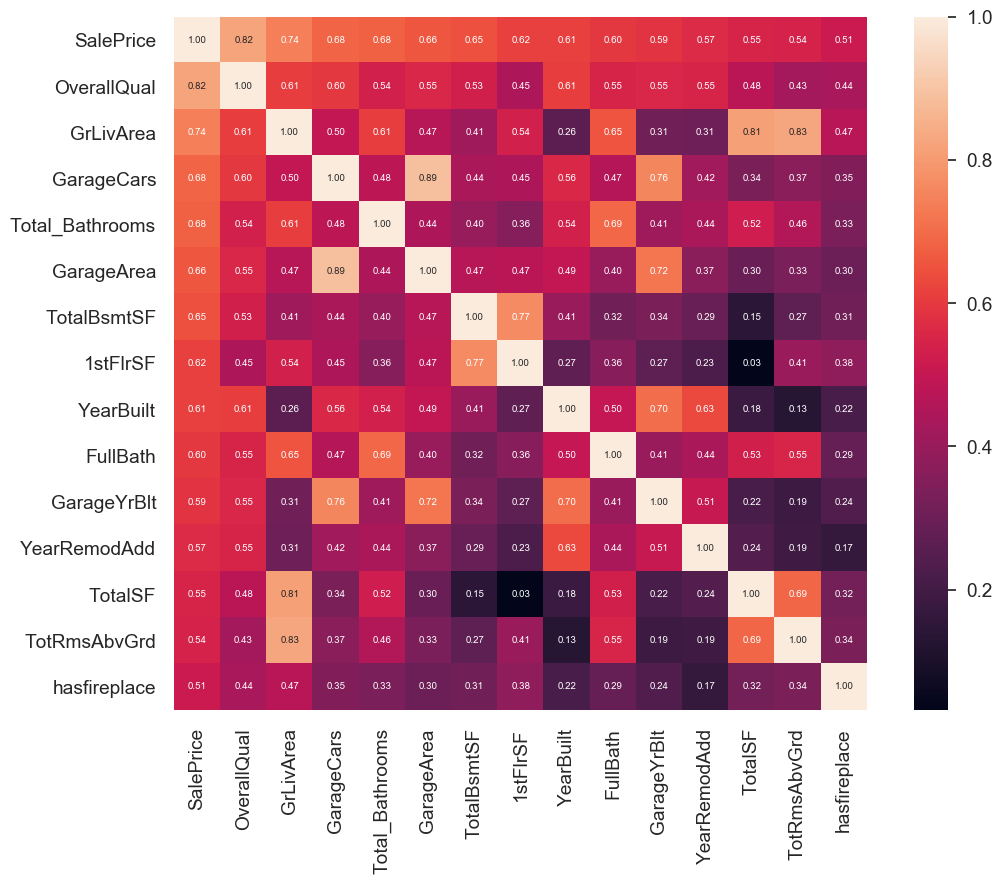

In [73]:
# saleprice correlation matrix
corr_num = 15 #number of variables for heatmap
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

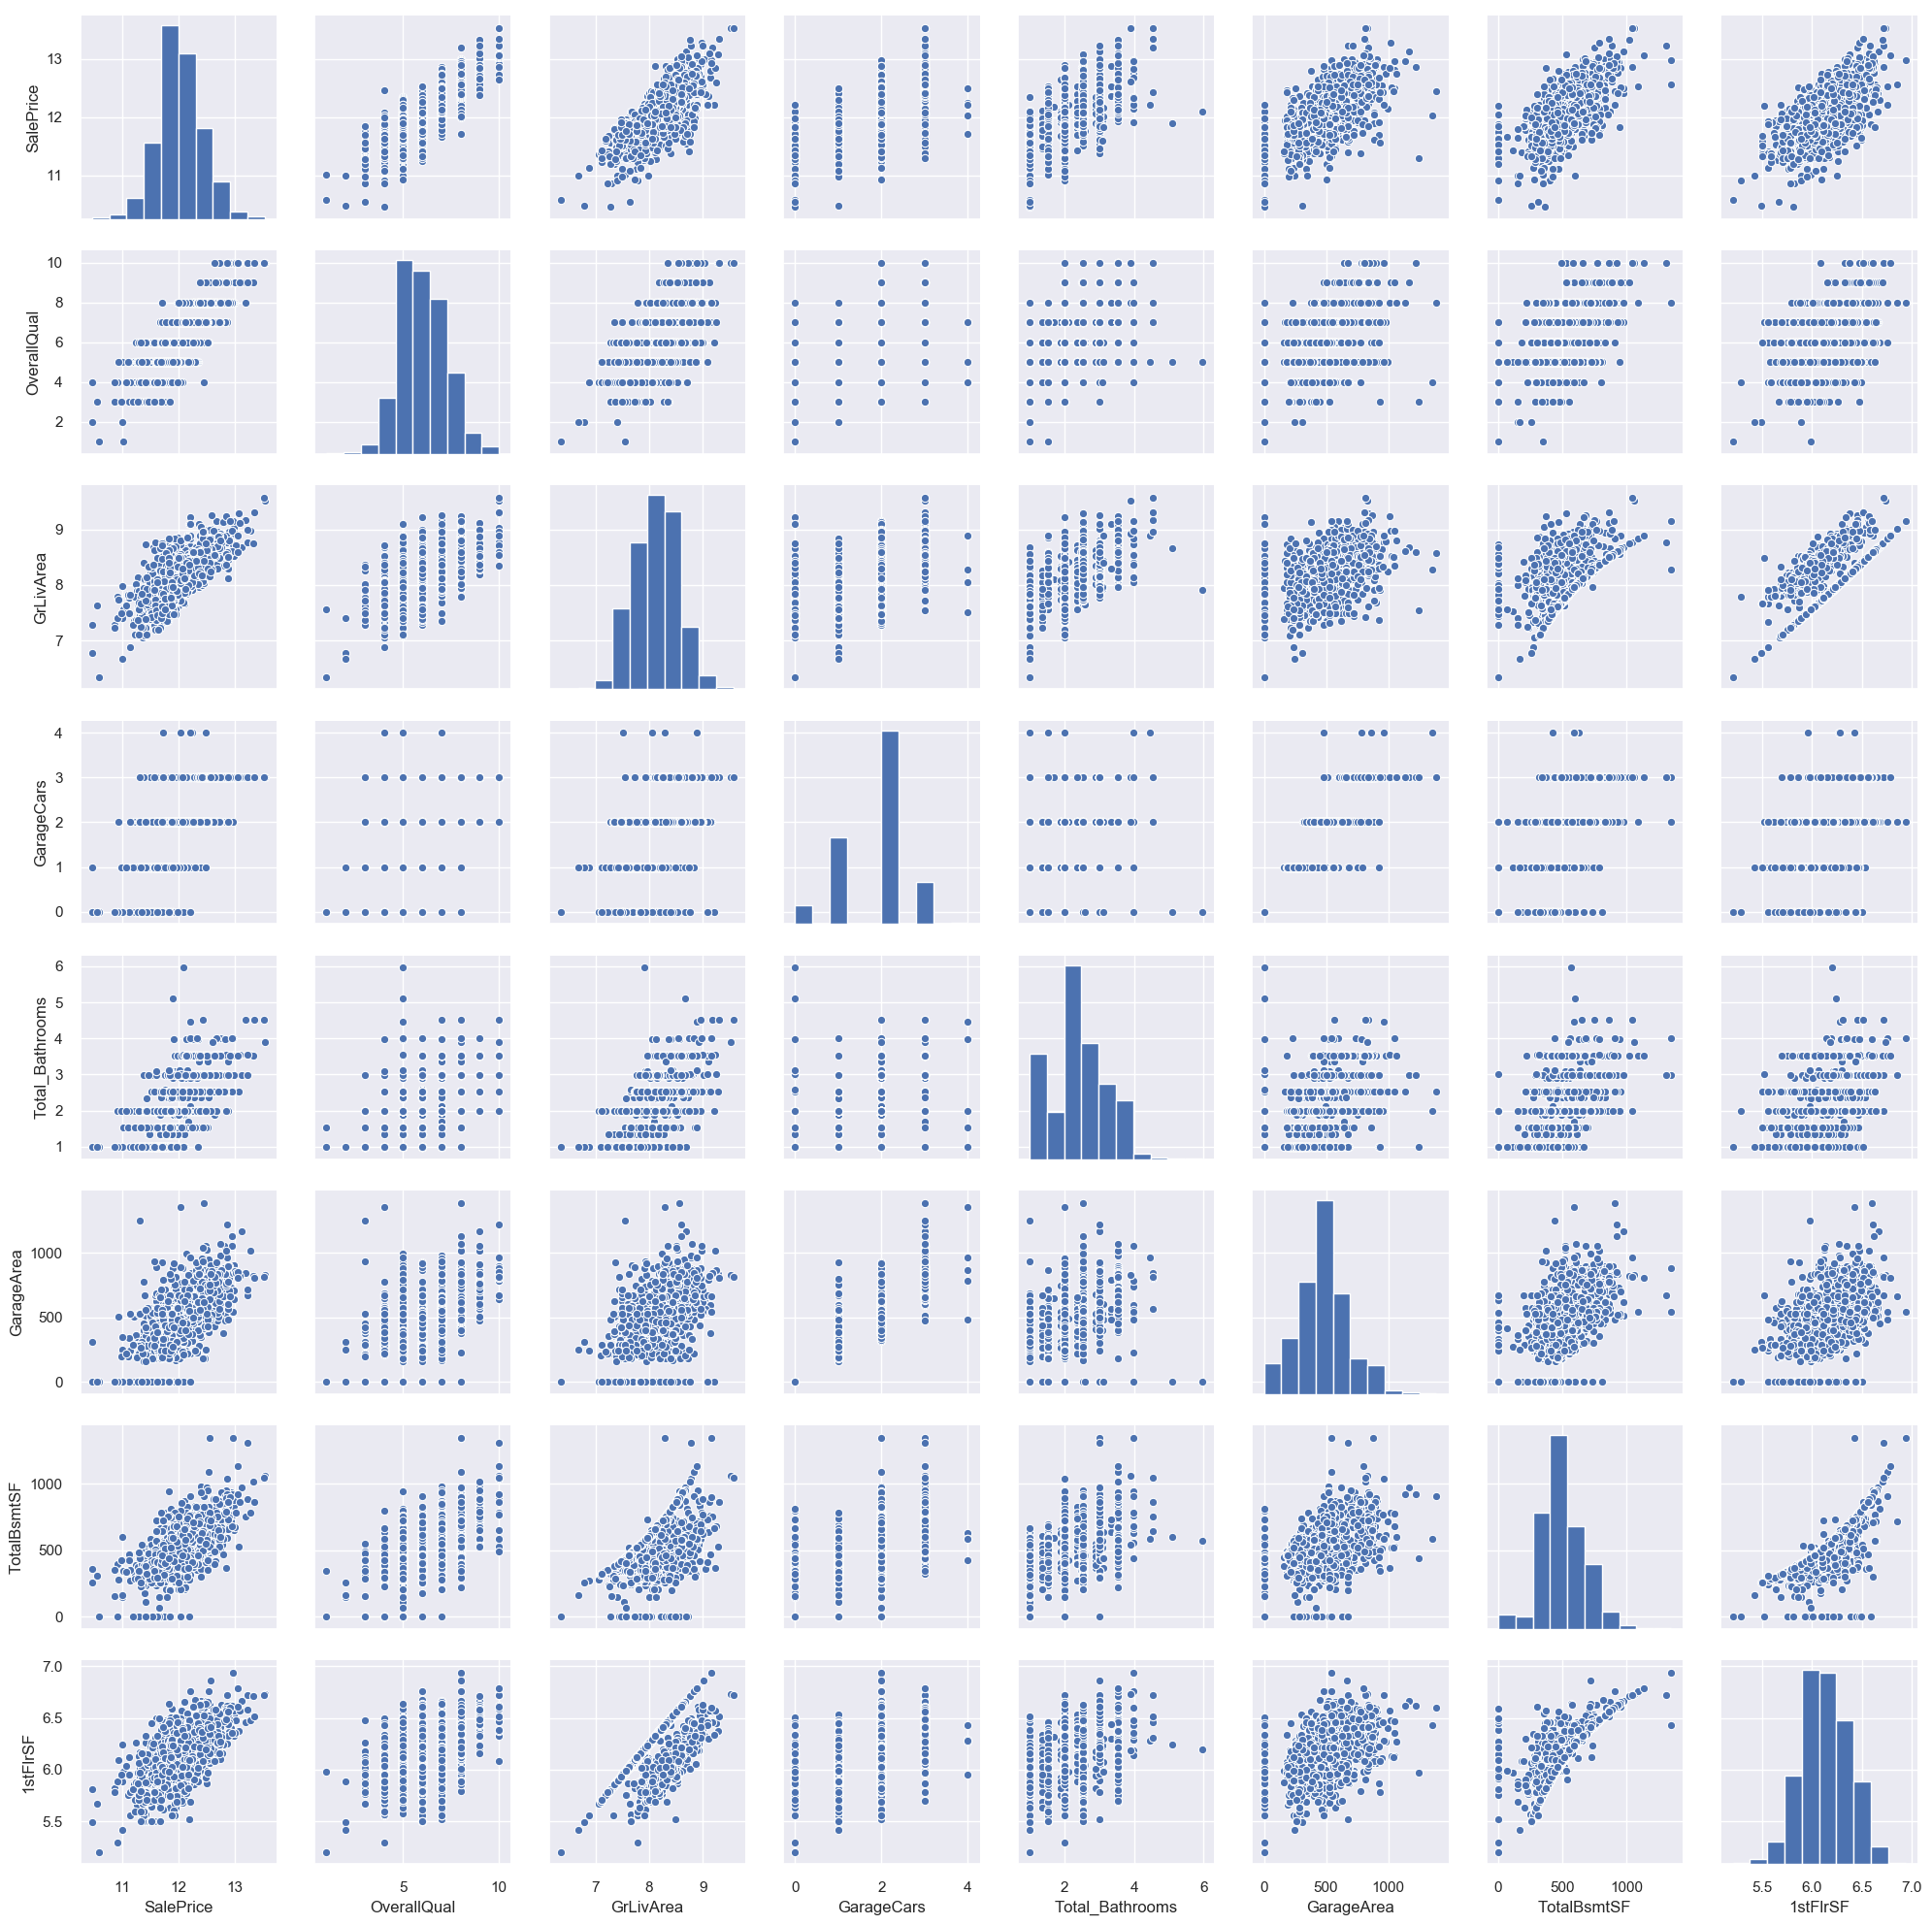

In [74]:
# pair plots for variables with largest correlation
var_num = 8
vars = cols_corr[0:var_num]

sns.set()
sns.pairplot(train[vars], size = 2.5)
plt.show();

# Preparing Data

In [75]:
#Dropping Sale price, Creating dummy variable for the categorial variables and matching dimentions between train and test
data_features = data_features.drop("SalePrice", axis = 1)
final_features = pd.get_dummies(data_features)

print(final_features.shape)
X = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
X.shape, y_train.shape, X_test.shape


print(X.shape,y_train.shape,X_test.shape)

(2912, 334)
(1453, 334) (1453,) (1459, 334)


In [76]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.95:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()

print(X.shape,y_train.shape,X_test.shape)

(1453, 331) (1453,) (1459, 331)


# Creating Model

In [84]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [85]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# model scoring and validation function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=kfolds))
    return (rmse)

# rmsle scoring function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [86]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=8000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

# xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)



# setup models hyperparameters using a pipline
# The purpose of the pipeline is to assemble several steps that can be cross-validated together, while setting different parameters.
# This is a range of values that the model considers each time in runs a CV
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]




# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, lightgbm),
                                meta_regressor=elasticnet,
                                use_features_in_secondary=True)

# store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'lightgbm': lightgbm}
#           'xgboost': xgboost}
predictions = {}
scores = {}

In [87]:
for name, model in models.items():
    
    model.fit(X, y)
    predictions[name] = np.expm1(model.predict(X))
    
    score = cv_rmse(model, X=X)
    scores[name] = (score.mean(), score.std())

In [88]:
# get the performance of each model on training data(validation set)
print('---- Score with CV_RMSLE-----')
score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


#Fit the training data X, y
print('----START Fit----',datetime.now())
print('Elasticnet')
elastic_model = elasticnet.fit(X, y)
print('Lasso')
lasso_model = lasso.fit(X, y)
print('Ridge')
ridge_model = ridge.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)


print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

---- Score with CV_RMSLE-----
Ridge score: 0.1022 (0.0141)

Lasso score: 0.1025 (0.0148)

ElasticNet score: 0.1027 (0.0149)

lightgbm score: 0.1055 (0.0154)

----START Fit---- 2019-07-31 16:00:39.789441
Elasticnet
Lasso
Ridge
lightgbm
stack_gen


In [89]:
def blend_models_predict(X):
    return ((0.25  * elastic_model.predict(X)) + \
            (0.25 * lasso_model.predict(X)) + \
            (0.2 * ridge_model.predict(X)) + \
            (0.10 * lgb_model_full_data.predict(X)) + \
#             (0.1 * xgb_model_full_data.predict(X)) + \
            (0.2 * stack_gen_model.predict(np.array(X))))

In [90]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.08638195732282392


In [123]:
print('Predict submission')
pred = pd.read_csv("data/sample_submission.csv")

pred['SalePrice'] = (np.expm1(blend_models_predict(X_test)))
pred

Predict submission


Id      SalePrice
0     1461  119755.223930
1     1462  157728.059161
2     1463  186484.388749
3     1464  204047.974758
4     1465  191628.985558
5     1466  170413.159596
6     1467  179997.571560
7     1468  162648.248120
8     1469  196614.486635
9     1470  120464.204496
10    1471  190276.830581
11    1472   96594.779135
12    1473   93812.890704
13    1474  145876.955366
14    1475  111631.423013
15    1476  362507.873090
16    1477  245653.459160
17    1478  291950.966734
18    1479  291372.755018
19    1480  482894.587994
20    1481  323908.274408
21    1482  209626.247423
22    1483  179431.499398
23    1484  161467.349614
24    1485  187136.964247
25    1486  195064.008942
26    1487  335840.547080
27    1488  244648.557772
28    1489  195913.661581
29    1490  247819.875762
...    ...            ...
1429  2890   79444.963567
1430  2891  135594.030239
1431  2892   52449.846315
1432  2893   85453.927028
1433  2894   62409.324405
1434  2895  346869.351504
1435  2896  289526.690160
1436  2897  211060.922059
1437  2898  148592.776751
1438  2899  209307.429277
1439  2900  158681.568790
1440  2901  209910.142597
1441  2902  184949.401454
1442  2903  319205.517539
1443  2904  343461.771094
1444  2905   84223.827367
1445  2906  194889.010612
1446  2907  110369.012672
1447  2908  127965.239298
1448  2909  150412.299238
1449  2910   78199.351779
1450  2911   82815.750417
1451  2912  145243.078298
1452  2913   80123.440353
1453  2914   78709.330200
1454  2915   87339.676675
1455  2916   80476.538637
1456  2917  169405.576227
1457  2918  116516.263677
1458  2919  218454.825327

[1459 rows x 2 columns]